# Churn Rate.
**Autor: Carlos Espadin Medina**

**Versión 3.0**

**Caso de estudio:** Syngenta México CP desea estimar el "Churn", cuyo significado es un término común en marketing que se refiere a la tasa de abandono o cancelación de clientes en un negocio o servicio en un período determinado.

## Librerias Necesarias:

In [301]:
import pandas as pd
import numpy as np
import missingno as msno
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from datetime import datetime
from qvd import qvd_reader

## Carga de Datos.

In [302]:
# df_clientes = qvd_reader.read(r"C:\Users\carlo\Syngenta\Projects for Analysis - General\Data\CustomerSales.qvd")
df_clientes = pd.read_excel(r"C:\Users\carlo\Syngenta\Projects for Analysis - General\Data\CustomerSales.xlsx")
df_clientes

,bp_id,Fecha de Facturacion,Material.Number,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro,Devoluciones,Estado,TERRITORY_NUM,SO,LineaNegocioAbrv,Consumo
0,21107556,31/10/2019,GESAPRIM AUTOSUSPENSIBLE 48% WS,19187,10141652,10141652,COMERCIALIZADORA DE INSUMOS,CPXC,17/11/2017,0,Tamaulipas,A9582B,3CR,HS,0.00
1,21107556,31/10/2019,HIERBAMINA,20255,10141652,10141652,COMERCIALIZADORA DE INSUMOS,CPXC,17/11/2017,0,Tamaulipas,A9582B,3CR,HS,0.00
2,21109001,31/10/2019,BANVEL12% WS,20151,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,Tamaulipas,A5742C,3CR,HS,0.00
3,21109001,31/10/2019,HIERBAMINA,20255,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,Tamaulipas,A5742C,3CR,HS,0.00
4,21109001,31/10/2019,PEAK,26867,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,Tamaulipas,A5742C,3CR,HS,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184546,21374308,02/02/2021,GRAMOXONE 20% WS,32717,500291,10099876,SERVICIO AGROTECNICO,CPXC,19/11/2020,0,Veracruz de Ignacio de la Llave,A5542H,3CR,HN,540491.90
184547,21374308,02/02/2021,KARATE ZEON,67951,500291,10099876,SERVICIO AGROTECNICO,CPXC,19/11/2020,0,Veracruz de Ignacio de la Llave,A5542H,3CR,IN,0.00
184548,21374308,02/02/2021,SANSON OD,63850,500291,10099876,SERVICIO AGROTECNICO,CPXC,19/11/2020,0,Veracruz de Ignacio de la Llave,A5542H,3CR,HS,69602.41
184549,21278715,01/06/2023,AMISTAR OPTI,33014,10302992,10303434,RAFAEL RODRIGUEZ MARTINEZ,CPXC,17/05/2019,1,Jalisco,A5342D,3CR,FG,-9350.29


In [303]:
df_clientes.sort_values(by='Fecha de Facturacion')

,bp_id,Fecha de Facturacion,Material.Number,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro,Devoluciones,Estado,TERRITORY_NUM,SO,LineaNegocioAbrv,Consumo
184550,21278715,01/06/2023,RIDOMIL GOLD BRAVO LIQUID SC,39964,10302992,10303434,RAFAEL RODRIGUEZ MARTINEZ,CPXC,17/05/2019,1,Jalisco,A5342D,3CR,FG,-61428.05
184549,21278715,01/06/2023,AMISTAR OPTI,33014,10302992,10303434,RAFAEL RODRIGUEZ MARTINEZ,CPXC,17/05/2019,1,Jalisco,A5342D,3CR,FG,-9350.29
184547,21374308,02/02/2021,KARATE ZEON,67951,500291,10099876,SERVICIO AGROTECNICO,CPXC,19/11/2020,0,Veracruz de Ignacio de la Llave,A5542H,3CR,IN,0.00
184522,21107383,02/02/2021,UNIFORM,44452,10147416,10147416,AGRO DEL LLANO,CPXC,17/11/2017,0,Jalisco,A9442D,3CR,FG,162038.47
184521,21107383,02/02/2021,TILT 25 EC,62219,10147416,10147416,AGRO DEL LLANO,CPXC,17/11/2017,0,Jalisco,A9442D,3CR,FG,20134.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,21109001,31/10/2019,PEAK,26867,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,Tamaulipas,A5742C,3CR,HS,0.00
3,21109001,31/10/2019,HIERBAMINA,20255,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,Tamaulipas,A5742C,3CR,HS,0.00
2,21109001,31/10/2019,BANVEL12% WS,20151,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,Tamaulipas,A5742C,3CR,HS,0.00
1,21107556,31/10/2019,HIERBAMINA,20255,10141652,10141652,COMERCIALIZADORA DE INSUMOS,CPXC,17/11/2017,0,Tamaulipas,A9582B,3CR,HS,0.00


In [304]:
df_clientes['Fecha de Facturacion'].min()

'01/06/2023'

In [305]:
df_clientes = df_clientes[df_clientes['bp_id'].notnull()]

In [306]:
df_clientes[df_clientes['bp_id'].isnull()]

,bp_id,Fecha de Facturacion,Material.Number,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro,Devoluciones,Estado,TERRITORY_NUM,SO,LineaNegocioAbrv,Consumo


## Preprocesamiento de los datos.

In [307]:
#### Tratamiento de datos null y cambio de nombre a ciertas columnas.
df_clientes['Devolucion']=df_clientes['Devoluciones']
df_clientes['Devolucion']=  pd.to_numeric(df_clientes['Devolucion'], errors='coerce')
df_clientes['Consumo']=  pd.to_numeric(df_clientes['Consumo'], errors='coerce')
df_clientes['bp_id'] = df_clientes['bp_id'].replace(['-', ' '], np.nan)
df_clientes['LineaNegocioAbrv'] = df_clientes['LineaNegocioAbrv'].replace(['-', ' '], np.nan)
df_clientes['Fecha_Registro'] = df_clientes['Fecha de Registro'].replace(['-', ' '], np.nan)
df_clientes['Estado'] = df_clientes['Estado'].replace(['-', ' '], np.nan)
df_clientes['Fecha de Facturacion'] = df_clientes['Fecha de Facturacion'].replace(['-', ' '], None)
df_clientes['Material.Number'] = df_clientes['Material.Number'].replace([np.nan], 'Sin producto')
df_clientes

,bp_id,Fecha de Facturacion,Material.Number,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro,Devoluciones,Estado,TERRITORY_NUM,SO,LineaNegocioAbrv,Consumo,Devolucion,Fecha_Registro
0,21107556,31/10/2019,GESAPRIM AUTOSUSPENSIBLE 48% WS,19187,10141652,10141652,COMERCIALIZADORA DE INSUMOS,CPXC,17/11/2017,0,Tamaulipas,A9582B,3CR,HS,0.00,0,17/11/2017
1,21107556,31/10/2019,HIERBAMINA,20255,10141652,10141652,COMERCIALIZADORA DE INSUMOS,CPXC,17/11/2017,0,Tamaulipas,A9582B,3CR,HS,0.00,0,17/11/2017
2,21109001,31/10/2019,BANVEL12% WS,20151,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,Tamaulipas,A5742C,3CR,HS,0.00,0,17/11/2017
3,21109001,31/10/2019,HIERBAMINA,20255,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,Tamaulipas,A5742C,3CR,HS,0.00,0,17/11/2017
4,21109001,31/10/2019,PEAK,26867,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,Tamaulipas,A5742C,3CR,HS,0.00,0,17/11/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184546,21374308,02/02/2021,GRAMOXONE 20% WS,32717,500291,10099876,SERVICIO AGROTECNICO,CPXC,19/11/2020,0,Veracruz de Ignacio de la Llave,A5542H,3CR,HN,540491.90,0,19/11/2020
184547,21374308,02/02/2021,KARATE ZEON,67951,500291,10099876,SERVICIO AGROTECNICO,CPXC,19/11/2020,0,Veracruz de Ignacio de la Llave,A5542H,3CR,IN,0.00,0,19/11/2020
184548,21374308,02/02/2021,SANSON OD,63850,500291,10099876,SERVICIO AGROTECNICO,CPXC,19/11/2020,0,Veracruz de Ignacio de la Llave,A5542H,3CR,HS,69602.41,0,19/11/2020
184549,21278715,01/06/2023,AMISTAR OPTI,33014,10302992,10303434,RAFAEL RODRIGUEZ MARTINEZ,CPXC,17/05/2019,1,Jalisco,A5342D,3CR,FG,-9350.29,1,17/05/2019


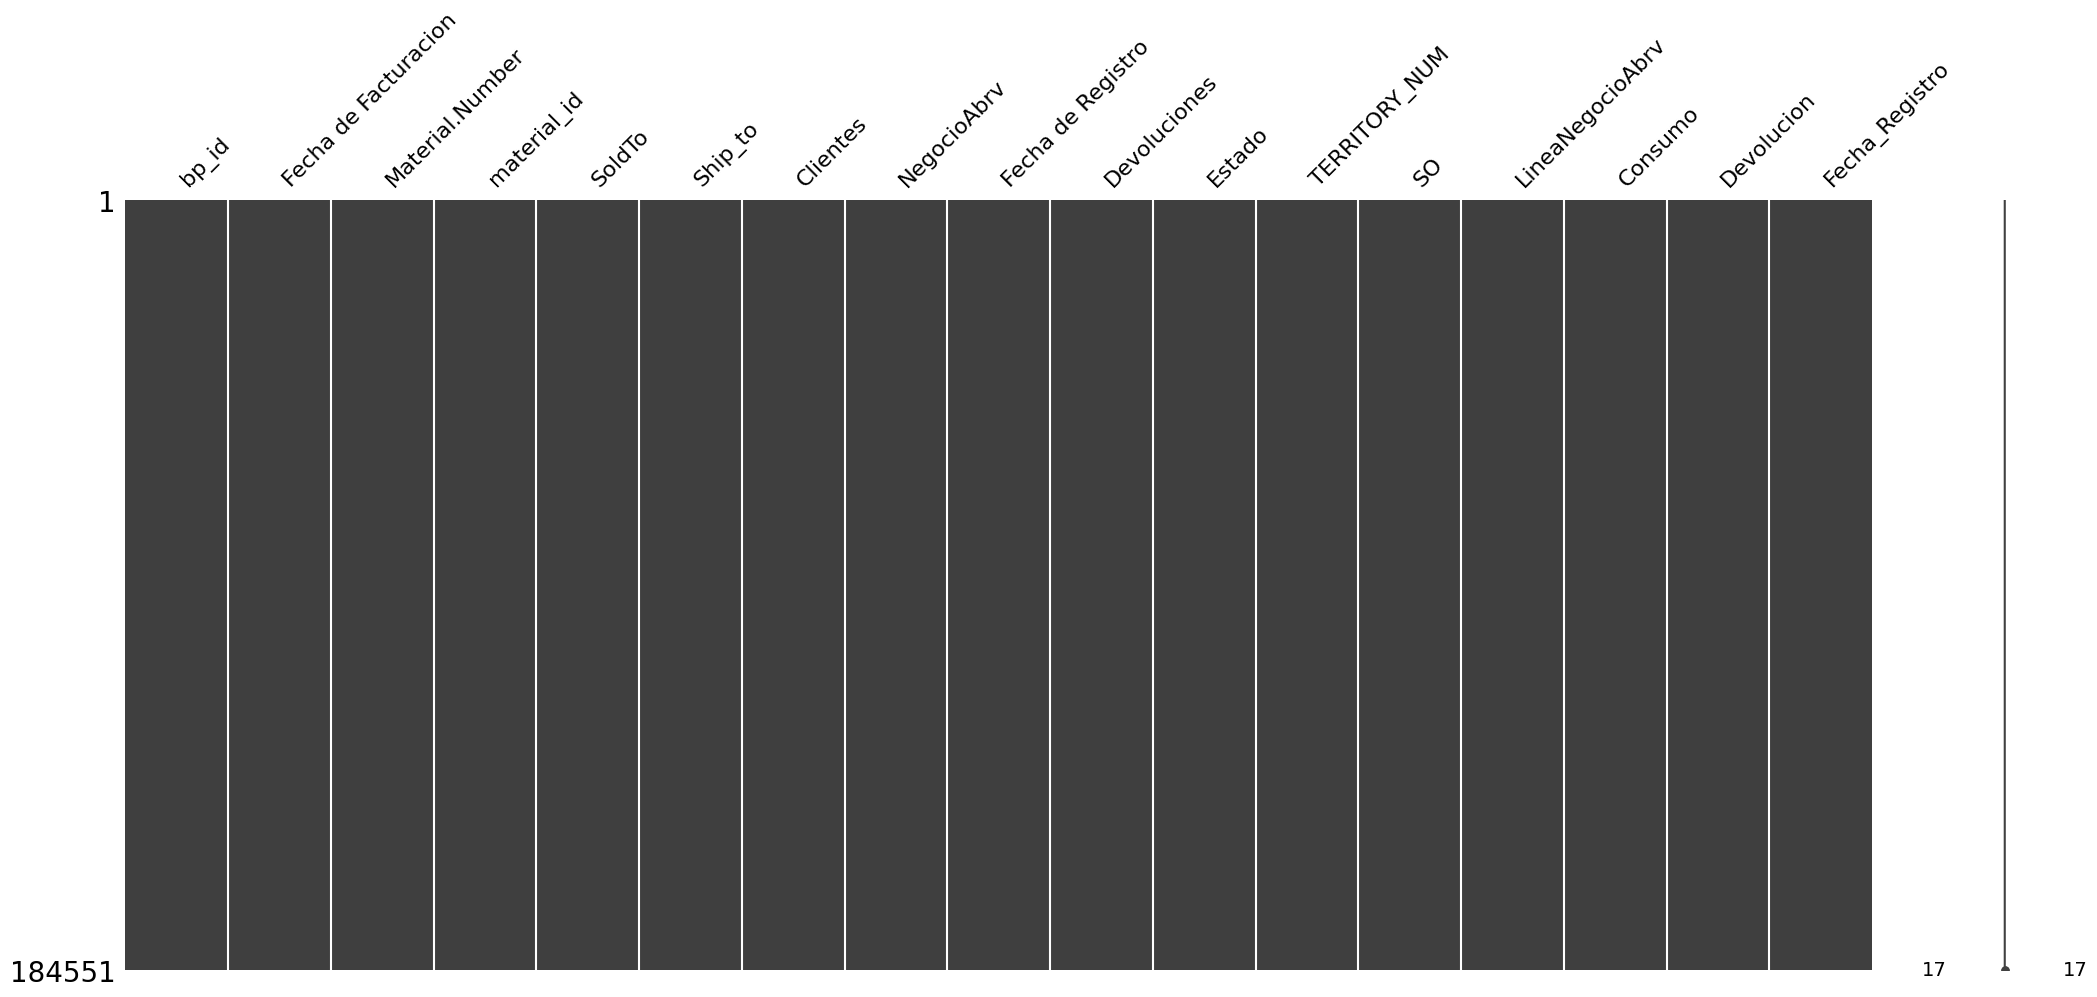

In [308]:
msno.matrix(df_clientes);

<Axes: >

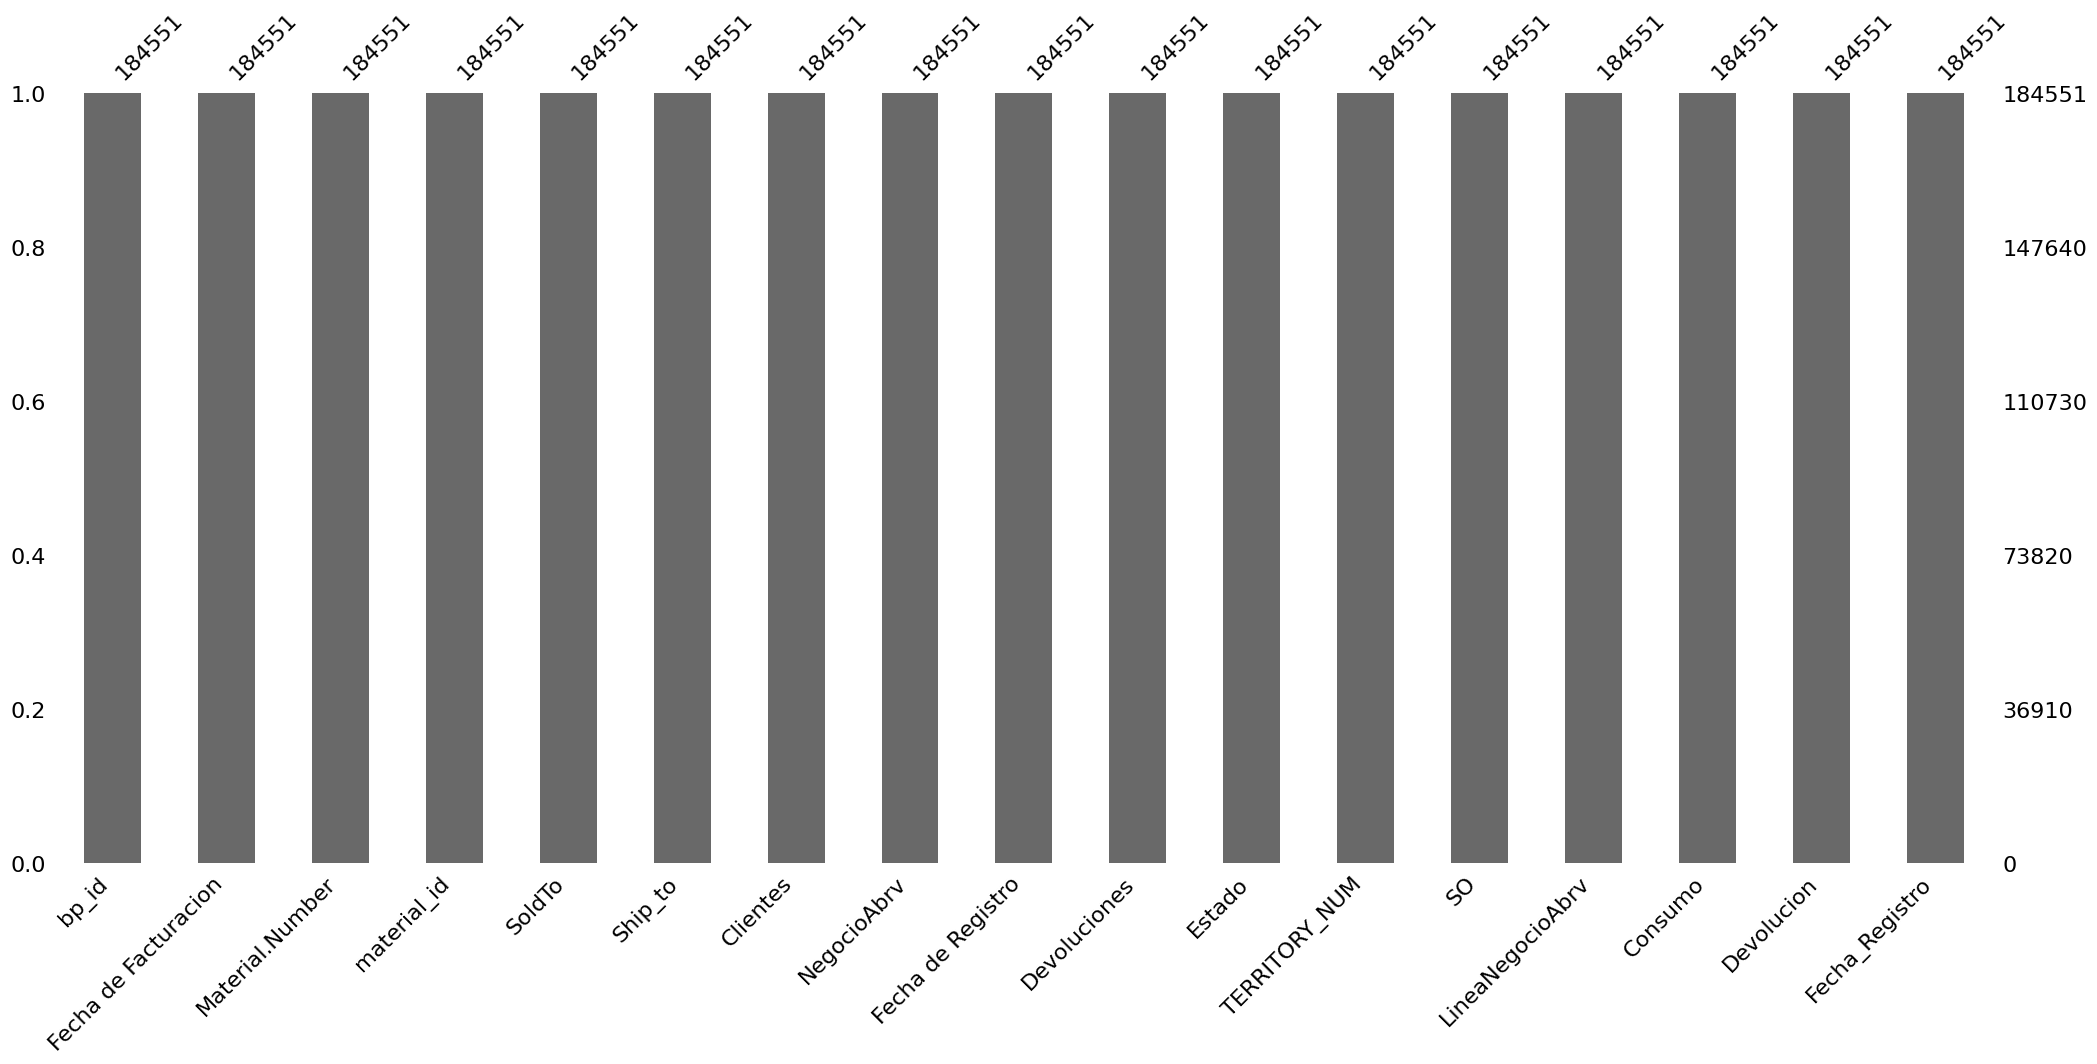

In [309]:
msno.bar(df_clientes)

### Se agrega el dato de material mas comprado por cliente

In [310]:
## Se agrega el dato de material mas comprado por cliente
modaMaterial = df_clientes.groupby('bp_id')['Material.Number'].apply(lambda x: x.mode().iloc[0]).reset_index()

## Se incorpora al nuevo dataframe.

df_clientes = df_clientes.merge(modaMaterial, on='bp_id', how='left') 
df_clientes.rename(columns={'Material.Number_y': 'Material.Number'}, inplace=True)

Tratamiento de fechas de registro

In [311]:
# Encontrar la fecha más reciente para cada 'SoldTo'
fecha_mas_reciente = df_clientes.groupby(['bp_id'])['Fecha de Registro'].max().reset_index()

In [312]:
df_clientes = df_clientes.merge(fecha_mas_reciente, on='bp_id', how='left')
# df_clientes.rename(columns={'Fecha de Registro_x': 'FechaRegistro'}, inplace=True)

# df_clientes['FechaRegistro'].drop()

df_clientes['Estado'] = df_clientes.groupby('bp_id')['Estado'].transform('last')
df_clientes['Territorio'] = df_clientes.groupby('bp_id')['TERRITORY_NUM'].transform('last')


df_clientes

,bp_id,Fecha de Facturacion,Material.Number_x,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro_x,Devoluciones,Estado,TERRITORY_NUM,SO,LineaNegocioAbrv,Consumo,Devolucion,Fecha_Registro,Material.Number,Fecha de Registro_y,Territorio
0,21107556,31/10/2019,GESAPRIM AUTOSUSPENSIBLE 48% WS,19187,10141652,10141652,COMERCIALIZADORA DE INSUMOS,CPXC,17/11/2017,0,Tamaulipas,A9582B,3CR,HS,0.00,0,17/11/2017,PEAK,17/11/2017,A9582B
1,21107556,31/10/2019,HIERBAMINA,20255,10141652,10141652,COMERCIALIZADORA DE INSUMOS,CPXC,17/11/2017,0,Tamaulipas,A9582B,3CR,HS,0.00,0,17/11/2017,PEAK,17/11/2017,A9582B
2,21109001,31/10/2019,BANVEL12% WS,20151,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,Tamaulipas,A5742C,3CR,HS,0.00,0,17/11/2017,PEAK,17/11/2017,A5742C
3,21109001,31/10/2019,HIERBAMINA,20255,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,Tamaulipas,A5742C,3CR,HS,0.00,0,17/11/2017,PEAK,17/11/2017,A5742C
4,21109001,31/10/2019,PEAK,26867,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,Tamaulipas,A5742C,3CR,HS,0.00,0,17/11/2017,PEAK,17/11/2017,A5742C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184546,21374308,02/02/2021,GRAMOXONE 20% WS,32717,500291,10099876,SERVICIO AGROTECNICO,CPXC,19/11/2020,0,Veracruz de Ignacio de la Llave,A5542H,3CR,HN,540491.90,0,19/11/2020,CERILLO 20% WS,19/11/2020,A5542H
184547,21374308,02/02/2021,KARATE ZEON,67951,500291,10099876,SERVICIO AGROTECNICO,CPXC,19/11/2020,0,Veracruz de Ignacio de la Llave,A5542H,3CR,IN,0.00,0,19/11/2020,CERILLO 20% WS,19/11/2020,A5542H
184548,21374308,02/02/2021,SANSON OD,63850,500291,10099876,SERVICIO AGROTECNICO,CPXC,19/11/2020,0,Veracruz de Ignacio de la Llave,A5542H,3CR,HS,69602.41,0,19/11/2020,CERILLO 20% WS,19/11/2020,A5542H
184549,21278715,01/06/2023,AMISTAR OPTI,33014,10302992,10303434,RAFAEL RODRIGUEZ MARTINEZ,CPXC,17/05/2019,1,Jalisco,A5342D,3CR,FG,-9350.29,1,17/05/2019,COLOSO TOTAL,17/05/2019,A5342D


### Pre-EDA

In [313]:
df_clientes.shape

(184551, 20)

In [314]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184551 entries, 0 to 184550
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   bp_id                 184551 non-null  int64  
 1   Fecha de Facturacion  184551 non-null  object 
 2   Material.Number_x     184551 non-null  object 
 3   material_id           184551 non-null  int64  
 4   SoldTo                184551 non-null  int64  
 5   Ship_to               184551 non-null  int64  
 6   Clientes              184551 non-null  object 
 7   NegocioAbrv           184551 non-null  object 
 8   Fecha de Registro_x   184551 non-null  object 
 9   Devoluciones          184551 non-null  int64  
 10  Estado                184551 non-null  object 
 11  TERRITORY_NUM         184551 non-null  object 
 12  SO                    184551 non-null  object 
 13  LineaNegocioAbrv      184551 non-null  object 
 14  Consumo               184551 non-null  float64
 15  

In [315]:
df_clientes.columns.values

array(['bp_id', 'Fecha de Facturacion', 'Material.Number_x',
       'material_id', 'SoldTo', 'Ship_to', 'Clientes', 'NegocioAbrv',
       'Fecha de Registro_x', 'Devoluciones', 'Estado', 'TERRITORY_NUM',
       'SO', 'LineaNegocioAbrv', 'Consumo', 'Devolucion',
       'Fecha_Registro', 'Material.Number', 'Fecha de Registro_y',
       'Territorio'], dtype=object)

In [316]:
df_clientes.dtypes

bp_id                     int64
Fecha de Facturacion     object
Material.Number_x        object
material_id               int64
SoldTo                    int64
Ship_to                   int64
Clientes                 object
NegocioAbrv              object
Fecha de Registro_x      object
Devoluciones              int64
Estado                   object
TERRITORY_NUM            object
SO                       object
LineaNegocioAbrv         object
Consumo                 float64
Devolucion                int64
Fecha_Registro           object
Material.Number          object
Fecha de Registro_y      object
Territorio               object
dtype: object

#### Valores Faltantes.

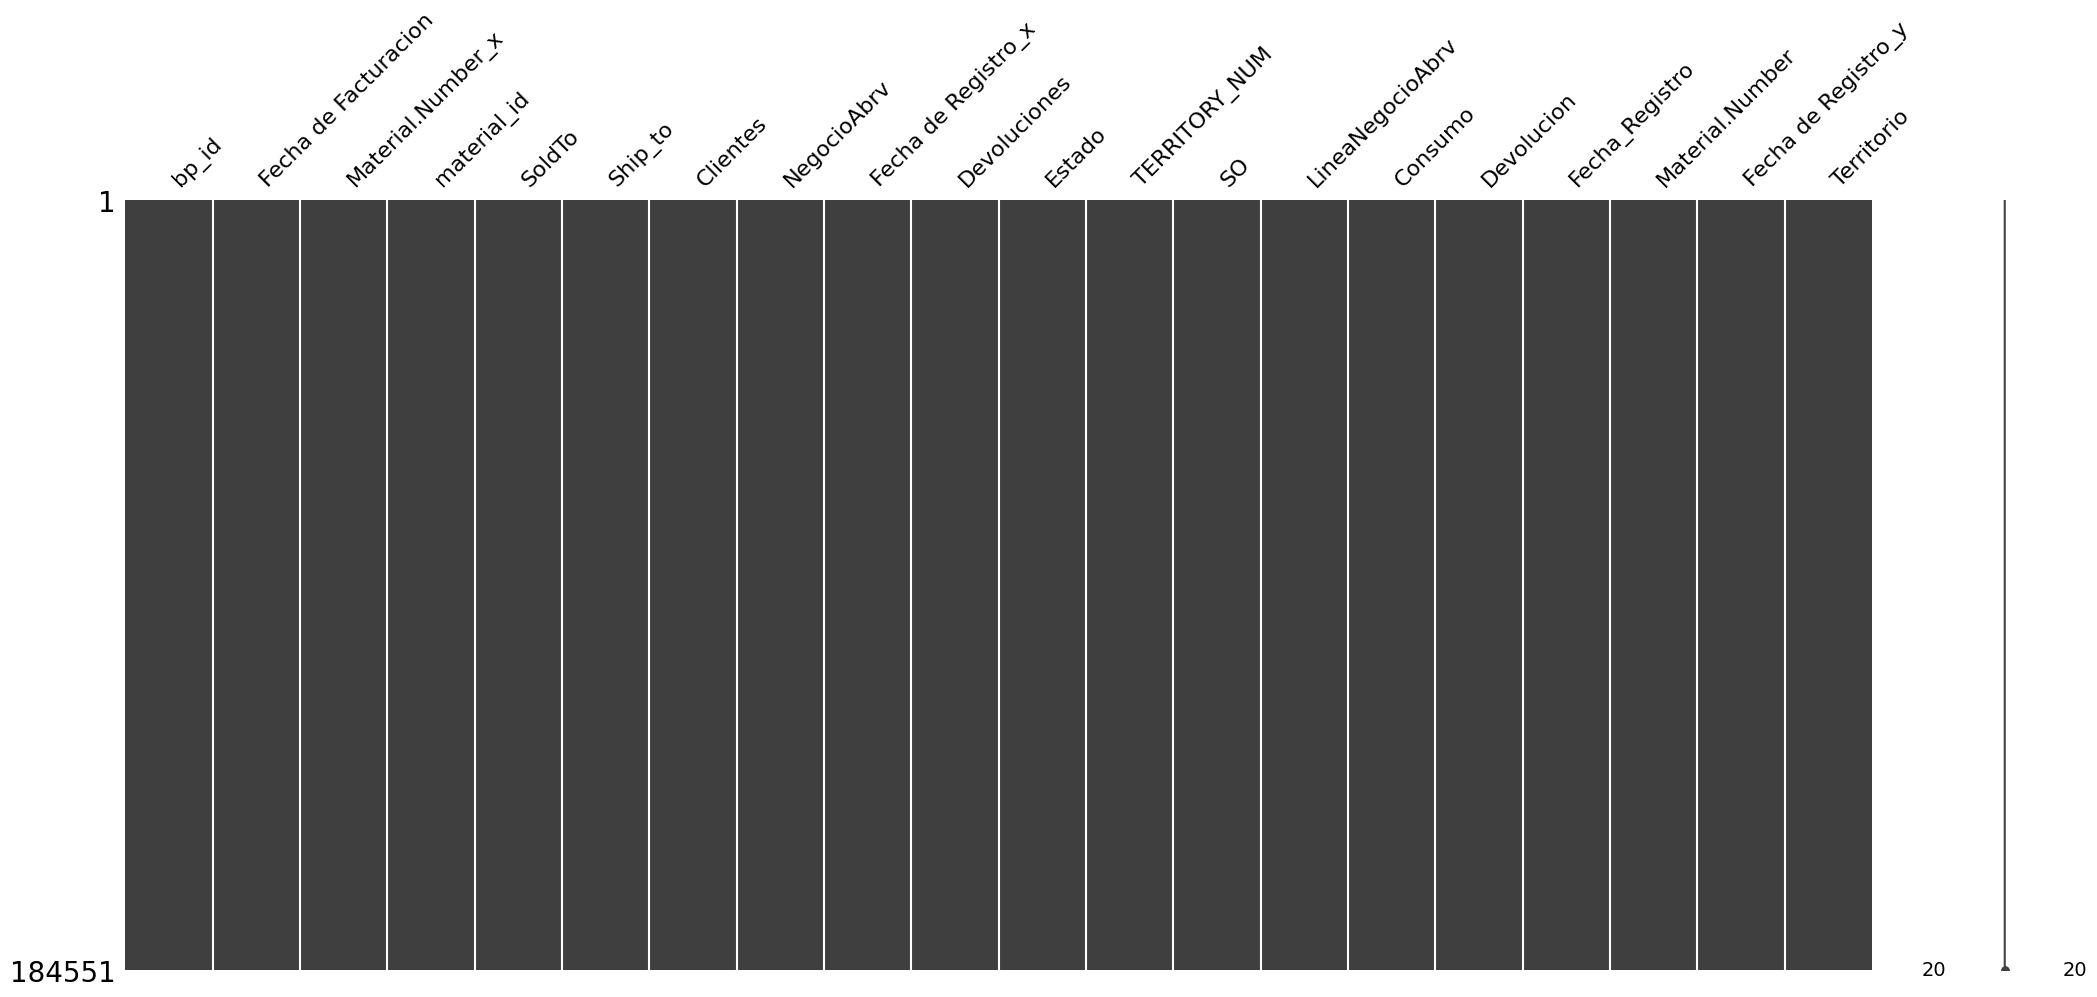

In [317]:
msno.matrix(df_clientes); 

### Agregamos el dato de material más comprado:

### Ordenamos los datos por cliente y fecha

In [318]:

### Encontrar la fecha mas reciente para cada 'bp_id' 
### Esto porque puede que un sold to tenga mas de una fecha de registro

fecha_mas_reciente = df_clientes.groupby(['bp_id'])['Fecha_Registro'].max().reset_index()

# Unimos la variable fecha_mas_reciente

df_clientes = df_clientes.merge(fecha_mas_reciente, on='bp_id', how='left')
df_clientes.rename(columns={'Fecha_Registro_y': 'FechaRegistro'}, inplace=True)

In [319]:
df_clientes = df_clientes.sort_values(['Fecha de Facturacion'])
df_clientes

,bp_id,Fecha de Facturacion,Material.Number_x,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro_x,Devoluciones,...,TERRITORY_NUM,SO,LineaNegocioAbrv,Consumo,Devolucion,Fecha_Registro_x,Material.Number,Fecha de Registro_y,Territorio,FechaRegistro
184550,21278715,01/06/2023,RIDOMIL GOLD BRAVO LIQUID SC,39964,10302992,10303434,RAFAEL RODRIGUEZ MARTINEZ,CPXC,17/05/2019,1,...,A5342D,3CR,FG,-61428.05,1,17/05/2019,COLOSO TOTAL,17/05/2019,A5342D,17/05/2019
184549,21278715,01/06/2023,AMISTAR OPTI,33014,10302992,10303434,RAFAEL RODRIGUEZ MARTINEZ,CPXC,17/05/2019,1,...,A5342D,3CR,FG,-9350.29,1,17/05/2019,COLOSO TOTAL,17/05/2019,A5342D,17/05/2019
184547,21374308,02/02/2021,KARATE ZEON,67951,500291,10099876,SERVICIO AGROTECNICO,CPXC,19/11/2020,0,...,A5542H,3CR,IN,0.00,0,19/11/2020,CERILLO 20% WS,19/11/2020,A5542H,19/11/2020
184522,21107383,02/02/2021,UNIFORM,44452,10147416,10147416,AGRO DEL LLANO,CPXC,17/11/2017,0,...,A9442D,3CR,FG,162038.47,0,17/11/2017,GRAMOXONE 20% WS,17/11/2017,A9442D,17/11/2017
184521,21107383,02/02/2021,TILT 25 EC,62219,10147416,10147416,AGRO DEL LLANO,CPXC,17/11/2017,0,...,A9442D,3CR,FG,20134.01,0,17/11/2017,GRAMOXONE 20% WS,17/11/2017,A9442D,17/11/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,21109001,31/10/2019,PEAK,26867,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,...,A5742C,3CR,HS,0.00,0,17/11/2017,PEAK,17/11/2017,A5742C,17/11/2017
3,21109001,31/10/2019,HIERBAMINA,20255,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,...,A5742C,3CR,HS,0.00,0,17/11/2017,PEAK,17/11/2017,A5742C,17/11/2017
2,21109001,31/10/2019,BANVEL12% WS,20151,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,...,A5742C,3CR,HS,0.00,0,17/11/2017,PEAK,17/11/2017,A5742C,17/11/2017
1,21107556,31/10/2019,HIERBAMINA,20255,10141652,10141652,COMERCIALIZADORA DE INSUMOS,CPXC,17/11/2017,0,...,A9582B,3CR,HS,0.00,0,17/11/2017,PEAK,17/11/2017,A9582B,17/11/2017


### Hacemos los siguiente para la variable Estado.

In [320]:
df_clientes['Estado'] = df_clientes.groupby('bp_id')['Estado'].transform('last')
df_clientes['Territorio'] = df_clientes.groupby('bp_id')['TERRITORY_NUM'].transform('last')

<Axes: >

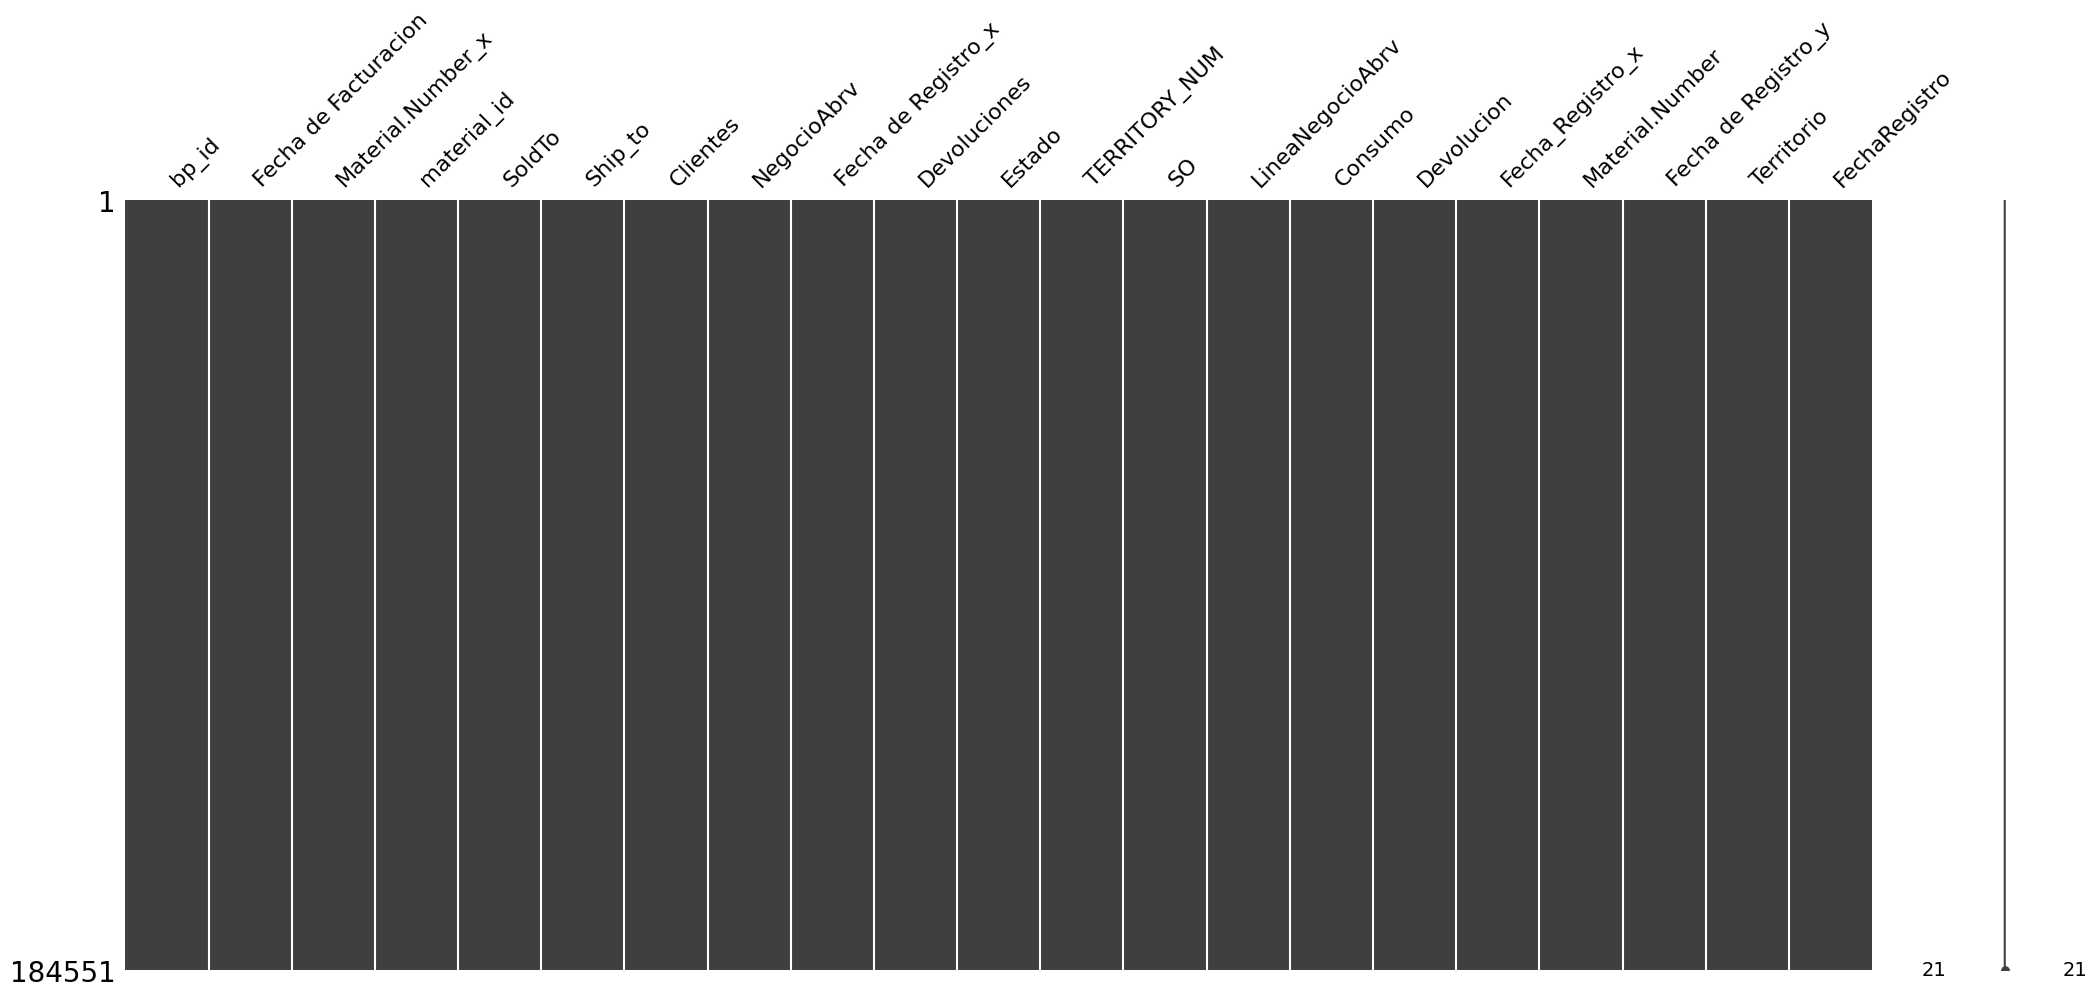

In [321]:
msno.matrix(df_clientes)

## Trasformamos el tipo datetime a Fecha de Facturacion

In [322]:
df_clientes['Fecha'] = pd.to_datetime(df_clientes['Fecha de Facturacion'], format= "%d/%m/%Y")
df_clientes

,bp_id,Fecha de Facturacion,Material.Number_x,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro_x,Devoluciones,...,SO,LineaNegocioAbrv,Consumo,Devolucion,Fecha_Registro_x,Material.Number,Fecha de Registro_y,Territorio,FechaRegistro,Fecha
184550,21278715,01/06/2023,RIDOMIL GOLD BRAVO LIQUID SC,39964,10302992,10303434,RAFAEL RODRIGUEZ MARTINEZ,CPXC,17/05/2019,1,...,3CR,FG,-61428.05,1,17/05/2019,COLOSO TOTAL,17/05/2019,A5342D,17/05/2019,2023-06-01
184549,21278715,01/06/2023,AMISTAR OPTI,33014,10302992,10303434,RAFAEL RODRIGUEZ MARTINEZ,CPXC,17/05/2019,1,...,3CR,FG,-9350.29,1,17/05/2019,COLOSO TOTAL,17/05/2019,A5342D,17/05/2019,2023-06-01
184547,21374308,02/02/2021,KARATE ZEON,67951,500291,10099876,SERVICIO AGROTECNICO,CPXC,19/11/2020,0,...,3CR,IN,0.00,0,19/11/2020,CERILLO 20% WS,19/11/2020,A5542E,19/11/2020,2021-02-02
184522,21107383,02/02/2021,UNIFORM,44452,10147416,10147416,AGRO DEL LLANO,CPXC,17/11/2017,0,...,3CR,FG,162038.47,0,17/11/2017,GRAMOXONE 20% WS,17/11/2017,A9442D,17/11/2017,2021-02-02
184521,21107383,02/02/2021,TILT 25 EC,62219,10147416,10147416,AGRO DEL LLANO,CPXC,17/11/2017,0,...,3CR,FG,20134.01,0,17/11/2017,GRAMOXONE 20% WS,17/11/2017,A9442D,17/11/2017,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,21109001,31/10/2019,PEAK,26867,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,...,3CR,HS,0.00,0,17/11/2017,PEAK,17/11/2017,A5742C,17/11/2017,2019-10-31
3,21109001,31/10/2019,HIERBAMINA,20255,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,...,3CR,HS,0.00,0,17/11/2017,PEAK,17/11/2017,A5742C,17/11/2017,2019-10-31
2,21109001,31/10/2019,BANVEL12% WS,20151,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,0,...,3CR,HS,0.00,0,17/11/2017,PEAK,17/11/2017,A5742C,17/11/2017,2019-10-31
1,21107556,31/10/2019,HIERBAMINA,20255,10141652,10141652,COMERCIALIZADORA DE INSUMOS,CPXC,17/11/2017,0,...,3CR,HS,0.00,0,17/11/2017,PEAK,17/11/2017,A9582B,17/11/2017,2019-10-31


## Se agrega analisis de Cohorts

In [323]:
df_clientes.sort_values(by='Fecha de Facturacion', inplace=True)

In [324]:
df_clientes['Periodos'] = df_clientes.Fecha.apply(lambda x: x.strftime('%Y-%m'))
df_clientes['Periodos'].head()

184550    2023-06
184549    2023-06
184544    2021-02
184543    2021-02
184542    2021-02
Name: Periodos, dtype: object

In [325]:
df_clientes['Usuarios'] = df_clientes['bp_id']

In [326]:
df_clientes.set_index('Usuarios', inplace=True)

df_clientes['CohortGroup'] = df_clientes.groupby(level=0)['Fecha'].min().apply(lambda x: x.strftime('%Y-%m'))
df_clientes.reset_index(inplace=True)
df_clientes

,Usuarios,bp_id,Fecha de Facturacion,Material.Number_x,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro_x,...,Consumo,Devolucion,Fecha_Registro_x,Material.Number,Fecha de Registro_y,Territorio,FechaRegistro,Fecha,Periodos,CohortGroup
0,21278715,21278715,01/06/2023,RIDOMIL GOLD BRAVO LIQUID SC,39964,10302992,10303434,RAFAEL RODRIGUEZ MARTINEZ,CPXC,17/05/2019,...,-61428.05,1,17/05/2019,COLOSO TOTAL,17/05/2019,A5342D,17/05/2019,2023-06-01,2023-06,2020-12
1,21278715,21278715,01/06/2023,AMISTAR OPTI,33014,10302992,10303434,RAFAEL RODRIGUEZ MARTINEZ,CPXC,17/05/2019,...,-9350.29,1,17/05/2019,COLOSO TOTAL,17/05/2019,A5342D,17/05/2019,2023-06-01,2023-06,2020-12
2,21374308,21374308,02/02/2021,CERILLO 20% WS,32732,500291,10100010,SERVICIO AGROTECNICO,CPXC,19/11/2020,...,222715.81,0,19/11/2020,CERILLO 20% WS,19/11/2020,A5542E,19/11/2020,2021-02-02,2021-02,2019-01
3,21374308,21374308,02/02/2021,CERILLO 20% WS,32732,500291,10099876,SERVICIO AGROTECNICO,CPXC,19/11/2020,...,38179.85,0,19/11/2020,CERILLO 20% WS,19/11/2020,A5542E,19/11/2020,2021-02-02,2021-02,2019-01
4,21374308,21374308,02/02/2021,CERILLO,15096,500291,10100010,SERVICIO AGROTECNICO,CPXC,19/11/2020,...,10349.94,0,19/11/2020,CERILLO 20% WS,19/11/2020,A5542E,19/11/2020,2021-02-02,2021-02,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184546,21109024,21109024,31/10/2019,BANVEL12% WS,20151,500317,500317,IMPULSORA AGRICOLA DE MATAMOROS,CPXC,17/11/2017,...,0.00,0,17/11/2017,PEAK,17/11/2017,A9582B,17/11/2017,2019-10-31,2019-10,2019-01
184547,21109001,21109001,31/10/2019,PEAK,26867,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,...,0.00,0,17/11/2017,PEAK,17/11/2017,A5742C,17/11/2017,2019-10-31,2019-10,2019-01
184548,21109001,21109001,31/10/2019,HIERBAMINA,20255,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,...,0.00,0,17/11/2017,PEAK,17/11/2017,A5742C,17/11/2017,2019-10-31,2019-10,2019-01
184549,21109001,21109001,31/10/2019,BANVEL12% WS,20151,10168593,10168593,AGRIFERTIL DEL VALLE,CPXC,17/11/2017,...,0.00,0,17/11/2017,PEAK,17/11/2017,A5742C,17/11/2017,2019-10-31,2019-10,2019-01


In [327]:
df_clientes['CohortGroup'].unique()

array(['2020-12', '2019-01', '2019-03', '2020-04', '2020-02', '2022-02',
       '2019-04', '2021-05', '2022-03', '2021-06', '2019-12', '2019-05',
       '2021-03', '2021-12', '2019-02', '2019-11', '2020-06', '2019-07',
       '2021-02', '2019-06', '2019-09', '2022-05', '2020-07', '2021-04',
       '2022-08', '2021-07', '2020-03', '2022-07', '2020-05', '2019-10',
       '2022-06', '2021-10', '2020-10', '2021-11', '2023-01', '2023-06',
       '2022-04', '2023-04', '2023-05', '2021-01', '2022-11', '2023-03',
       '2023-02', '2020-11', '2021-08', '2022-12', '2023-08', '2022-01',
       '2020-09', '2021-09', '2022-09', '2020-08', '2022-10', '2019-08',
       '2020-01', '2023-07'], dtype=object)

In [328]:
grouping = df_clientes.groupby(['CohortGroup', 'Periodos'])

In [329]:
cohorts = grouping.agg({'Usuarios': 'nunique',
                        'material_id': 'nunique',
                        'Consumo': 'sum'
                        })
cohorts

Usuarios  material_id       Consumo
CohortGroup Periodos                                     
2019-01     2019-01        129          111  2.437140e+08
            2019-02        100          115  2.112359e+08
            2019-03         81          118  1.296747e+08
            2019-04         91          118  1.703458e+08
            2019-05         90          117  2.960109e+08
...                        ...          ...           ...
2023-08     2024-02          1            9  4.206920e+05
            2024-03          1            1  3.174332e+05
            2024-06          1           26  1.355622e+06
            2024-07          1            1  1.487147e+04
            2024-09          1            6  4.663780e+05

[1758 rows x 3 columns]

Creamos la serie que contenga el tamaño de cada grupo de cohortes

In [330]:
cohort_size = cohorts['Usuarios'].groupby(level=0).first()
cohort_size

CohortGroup
2019-01    129
2019-02     52
2019-03     31
2019-04     37
2019-05     39
2019-06     21
2019-07      5
2019-08      3
2019-09      7
2019-10      6
2019-11      6
2019-12     12
2020-01      2
2020-02      2
2020-03      7
2020-04      3
2020-05      5
2020-06      8
2020-07      2
2020-08      4
2020-09      5
2020-10      4
2020-11      1
2020-12     10
2021-01      4
2021-02      1
2021-03      6
2021-04      6
2021-05      8
2021-06      7
2021-07      2
2021-08      3
2021-09      1
2021-10      4
2021-11      7
2021-12      5
2022-01      2
2022-02      7
2022-03      6
2022-04      7
2022-05      4
2022-06      6
2022-07      3
2022-08      2
2022-09      1
2022-10      2
2022-11      2
2022-12      1
2023-01      3
2023-02      2
2023-03      2
2023-04      2
2023-05      4
2023-06      1
2023-07      1
2023-08      2
Name: Usuarios, dtype: int64

In [331]:
retentio=cohorts['Usuarios'].unstack(0)
retentio = retentio.T
retentio

Periodos,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09
CohortGroup,,,,,,,,,,,,,,,,,,,,,
2019-01,129.0,100.0,81.0,91.0,90.0,94.0,101.0,90.0,65.0,77.0,...,68.0,62.0,75.0,60.0,64.0,69.0,70.0,72.0,71.0,67.0
2019-02,NaN,52.0,19.0,27.0,29.0,33.0,34.0,32.0,15.0,16.0,...,11.0,12.0,11.0,13.0,13.0,15.0,16.0,18.0,18.0,15.0
2019-03,NaN,NaN,31.0,19.0,19.0,22.0,22.0,23.0,8.0,8.0,...,6.0,9.0,8.0,7.0,10.0,14.0,12.0,15.0,16.0,11.0
2019-04,NaN,NaN,NaN,37.0,19.0,22.0,20.0,22.0,6.0,8.0,...,4.0,2.0,6.0,9.0,8.0,10.0,9.0,13.0,13.0,9.0
2019-05,NaN,NaN,NaN,NaN,39.0,28.0,25.0,21.0,4.0,6.0,...,6.0,6.0,5.0,5.0,8.0,10.0,14.0,14.0,11.0,6.0
2019-06,NaN,NaN,NaN,NaN,NaN,21.0,16.0,10.0,5.0,4.0,...,1.0,1.0,2.0,2.0,3.0,4.0,5.0,4.0,6.0,5.0
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,5.0,...,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0


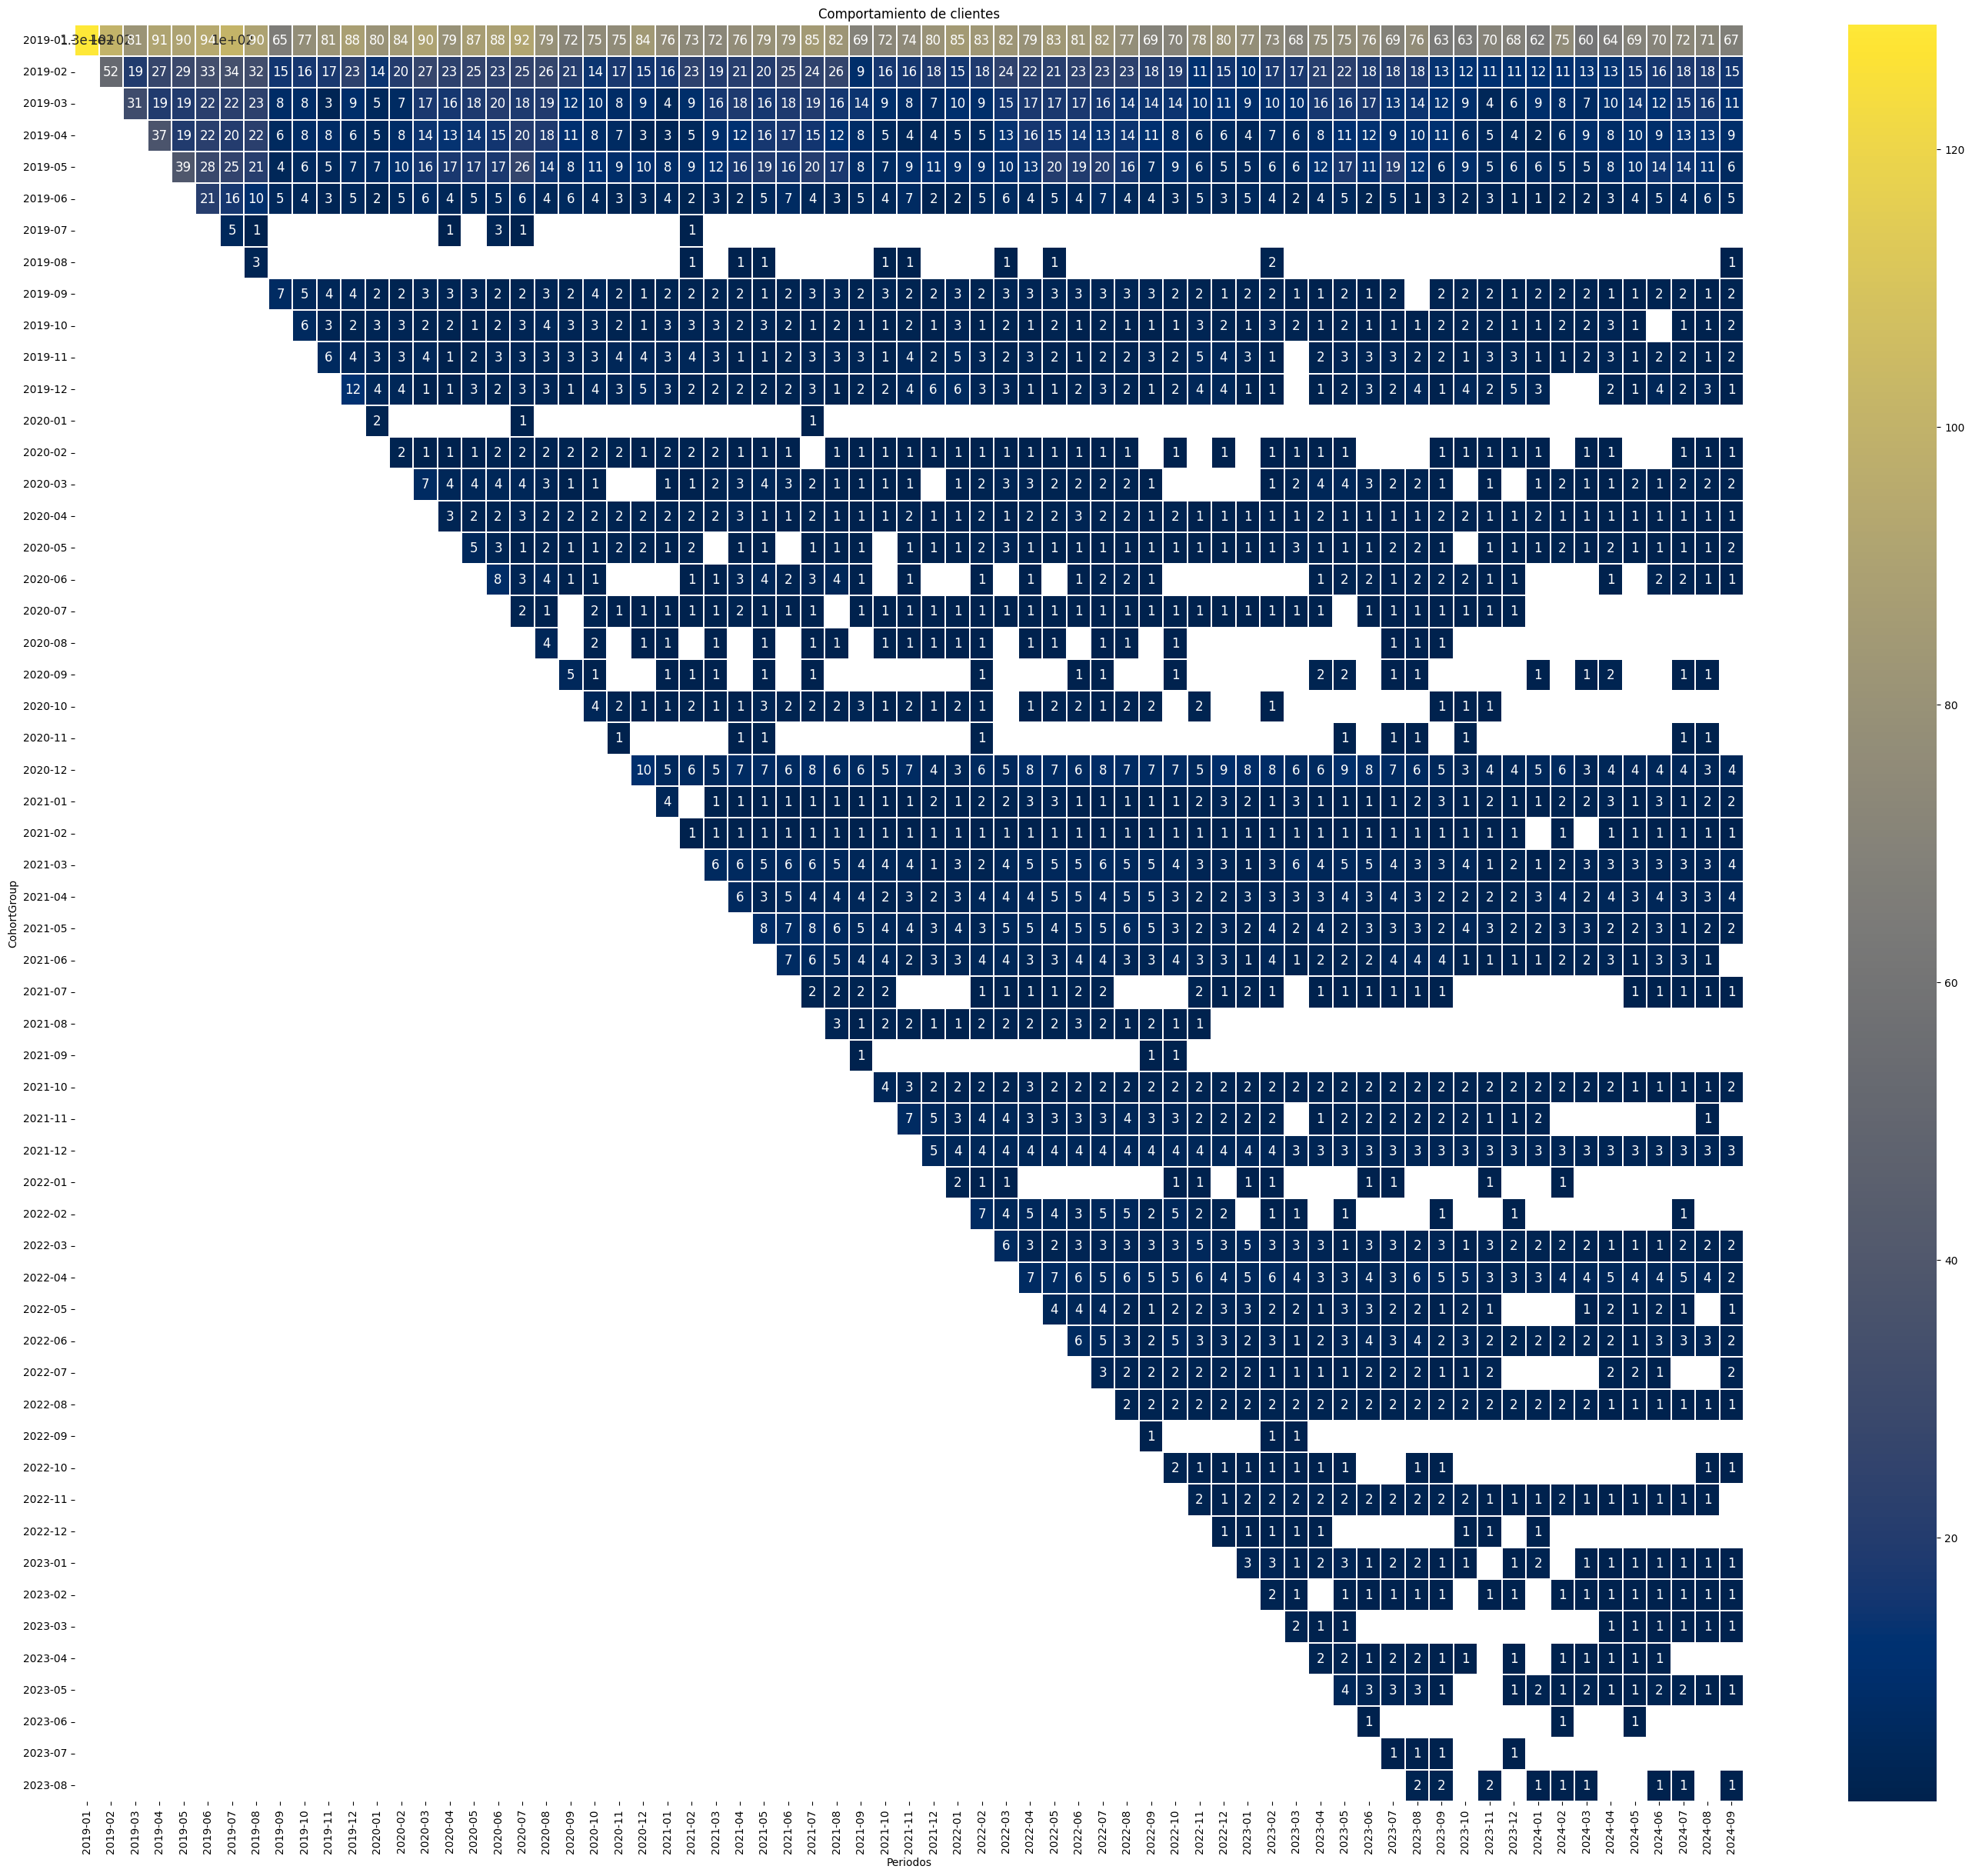

<Figure size 640x480 with 0 Axes>

In [332]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(35, 30))
plt.title('Comportamiento de clientes')
sns.heatmap(data = retentio,
            # xticklabels=df_clientes['CohortIndex'].unique(),
            # yticklabels=df_clientes['InvoiceMonth'].sort_values().apply(lambda x: x.strftime("%Y %b, %d")).unique(),
            annot_kws={'size':12},
            annot=True,
            cbar=True,
            linewidths=.2,
            cmap='cividis')
plt.show()
plt.savefig(r'C:\Users\carlo\OneDrive\Documentos\Tesis Carlos Espadin\Gráficas e Imagenes\Cohort.png')

In [333]:
CohortDay = df_clientes.groupby(['bp_id'])['Fecha de Facturacion'].min().reset_index()
df_clientes = df_clientes.merge(CohortDay, on='bp_id', how='left')
df_clientes.rename(columns={'Fecha de Facturacion_y': 'CohortDay'}, inplace=True)

df_clientes.head()

,Usuarios,bp_id,Fecha de Facturacion_x,Material.Number_x,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro_x,...,Devolucion,Fecha_Registro_x,Material.Number,Fecha de Registro_y,Territorio,FechaRegistro,Fecha,Periodos,CohortGroup,CohortDay
0,21278715,21278715,01/06/2023,RIDOMIL GOLD BRAVO LIQUID SC,39964,10302992,10303434,RAFAEL RODRIGUEZ MARTINEZ,CPXC,17/05/2019,...,1,17/05/2019,COLOSO TOTAL,17/05/2019,A5342D,17/05/2019,2023-06-01,2023-06,2020-12,01/06/2023
1,21278715,21278715,01/06/2023,AMISTAR OPTI,33014,10302992,10303434,RAFAEL RODRIGUEZ MARTINEZ,CPXC,17/05/2019,...,1,17/05/2019,COLOSO TOTAL,17/05/2019,A5342D,17/05/2019,2023-06-01,2023-06,2020-12,01/06/2023
2,21374308,21374308,02/02/2021,CERILLO 20% WS,32732,500291,10100010,SERVICIO AGROTECNICO,CPXC,19/11/2020,...,0,19/11/2020,CERILLO 20% WS,19/11/2020,A5542E,19/11/2020,2021-02-02,2021-02,2019-01,02/02/2021
3,21374308,21374308,02/02/2021,CERILLO 20% WS,32732,500291,10099876,SERVICIO AGROTECNICO,CPXC,19/11/2020,...,0,19/11/2020,CERILLO 20% WS,19/11/2020,A5542E,19/11/2020,2021-02-02,2021-02,2019-01,02/02/2021
4,21374308,21374308,02/02/2021,CERILLO,15096,500291,10100010,SERVICIO AGROTECNICO,CPXC,19/11/2020,...,0,19/11/2020,CERILLO 20% WS,19/11/2020,A5542E,19/11/2020,2021-02-02,2021-02,2019-01,02/02/2021


In [334]:
df_clientes['Fecha de Facturacion_x'] = pd.to_datetime(df_clientes['Fecha de Facturacion_x'], format= "%d/%m/%Y")

In [335]:
df_clientes.sort_values(by='Fecha de Facturacion_x', inplace=True)

In [336]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [337]:
import datetime as dt

In [338]:
def get_month(x): return dt.datetime(x.year, x.month, 1)

In [339]:
df_clientes['InvoiceMonth'] = df_clientes['Fecha de Facturacion_x'].apply(get_month)

In [340]:
df_clientes['InvoiceMonth']

863      2019-01-01
865      2019-01-01
866      2019-01-01
867      2019-01-01
868      2019-01-01
            ...    
152505   2024-09-01
152506   2024-09-01
152507   2024-09-01
152500   2024-09-01
152454   2024-09-01
Name: InvoiceMonth, Length: 184551, dtype: datetime64[ns]

In [341]:
grouping = df_clientes.groupby('bp_id')['InvoiceMonth']
result = grouping.apply(list)
print(result)

bp_id
21107235    [2019-04-01 00:00:00, 2019-04-01 00:00:00, 201...
21107240    [2019-01-01 00:00:00, 2019-01-01 00:00:00, 201...
21107243    [2019-03-01 00:00:00, 2019-04-01 00:00:00, 201...
21107250    [2019-02-01 00:00:00, 2019-02-01 00:00:00, 201...
21107252    [2019-01-01 00:00:00, 2019-01-01 00:00:00, 201...
                                  ...                        
21506480    [2021-11-01 00:00:00, 2021-11-01 00:00:00, 202...
21508347    [2023-05-01 00:00:00, 2023-05-01 00:00:00, 202...
21511103    [2023-01-01 00:00:00, 2023-01-01 00:00:00, 202...
21531514    [2022-06-01 00:00:00, 2022-06-01 00:00:00, 202...
21535330    [2023-05-01 00:00:00, 2023-05-01 00:00:00, 202...
Name: InvoiceMonth, Length: 515, dtype: object


In [342]:
df_clientes['CohortMonth'] = grouping.transform('min')
df_clientes

,Usuarios,bp_id,Fecha de Facturacion_x,Material.Number_x,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro_x,...,Material.Number,Fecha de Registro_y,Territorio,FechaRegistro,Fecha,Periodos,CohortGroup,CohortDay,InvoiceMonth,CohortMonth
863,21109024,21109024,2019-01-03,ACEITE MINERAL 84.7% EC,19544,500317,500317,IMPULSORA AGRICOLA DE MATAMOROS,CPXC,17/11/2017,...,PEAK,17/11/2017,A9582B,17/11/2017,2019-01-03,2019-01,2019-01,03/01/2019,2019-01-01,2019-01-01
865,21108433,21108433,2019-01-03,RIDOMIL GOLD BRAVO LIQUID SC,39964,10165444,10165444,AGROQUIMICOS EL ROMANO,CPXC,17/11/2017,...,AGRIMEC,17/11/2017,A5442B,17/11/2017,2019-01-03,2019-01,2019-01,02/08/2023,2019-01-01,2019-01-01
866,21107914,21107914,2019-01-03,SULFOCOP F 68.5% WS,29183,10107676,10107676,NORMA ALICIA GALVAN GALVAN,CPXC,17/11/2017,...,COLOSO TOTAL,17/11/2017,A9582A,17/11/2017,2019-01-03,2019-01,2019-01,03/01/2019,2019-01-01,2019-01-01
867,21107252,21107252,2019-01-03,SWITCH 62.5 WG,13215,10262509,10267234,ABASTECEDORA AGRICENTER,CPXC,17/11/2017,...,GRAMOXONE 20% WS,17/11/2017,A9462I,17/11/2017,2019-01-03,2019-01,2019-01,03/01/2019,2019-01-01,2019-01-01
868,21107463,21107463,2019-01-03,SWITCH 62.5 WG,13215,10202350,10251554,SELEFF CRUZ CAMPOS,CPXC,17/11/2017,...,RIDOMIL GOLD 480 SL,17/11/2017,A9512J,17/11/2017,2019-01-03,2019-01,2019-01,03/01/2019,2019-01-01,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152505,21237981,21237981,2024-09-27,UNIFORM,44452,10288540,10288540,GABRIEL REYES MARTINEZ,CPXC,26/06/2018,...,AMPLIGO,26/06/2018,A9352B,26/06/2018,2024-09-27,2024-09,2019-03,02/06/2023,2024-09-01,2019-03-01
152506,21237981,21237981,2024-09-27,TILT 25 EC,62219,10288540,10288540,GABRIEL REYES MARTINEZ,CPXC,26/06/2018,...,AMPLIGO,26/06/2018,A9352B,26/06/2018,2024-09-27,2024-09,2019-03,02/06/2023,2024-09-01,2019-03-01
152507,21237981,21237981,2024-09-27,TECTO 60,80583,10288540,10288540,GABRIEL REYES MARTINEZ,CPXC,26/06/2018,...,AMPLIGO,26/06/2018,A9352B,26/06/2018,2024-09-27,2024-09,2019-03,02/06/2023,2024-09-01,2019-03-01
152500,21287758,21287758,2024-09-27,BANKIT 25SC,32693,10307532,10307532,TRANSPORTES PRODUCTOS DE ACERO,CPXC,25/07/2019,...,BANKIT 25SC,25/07/2019,A9352L,25/07/2019,2024-09-27,2024-09,2019-09,02/08/2022,2024-09-01,2019-09-01


In [343]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(df_clientes, 'Fecha de Facturacion_x')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(df_clientes, 'CohortMonth')

In [344]:
# Calculate difference in years
years_diff = invoice_year - cohort_year
# Calculate difference in months
months_diff = invoice_month - cohort_month
# Extract the difference in days from all previous values
df_clientes['CohortIndex'] = years_diff * 12 + months_diff + 1

df_clientes

,Usuarios,bp_id,Fecha de Facturacion_x,Material.Number_x,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro_x,...,Fecha de Registro_y,Territorio,FechaRegistro,Fecha,Periodos,CohortGroup,CohortDay,InvoiceMonth,CohortMonth,CohortIndex
863,21109024,21109024,2019-01-03,ACEITE MINERAL 84.7% EC,19544,500317,500317,IMPULSORA AGRICOLA DE MATAMOROS,CPXC,17/11/2017,...,17/11/2017,A9582B,17/11/2017,2019-01-03,2019-01,2019-01,03/01/2019,2019-01-01,2019-01-01,1
865,21108433,21108433,2019-01-03,RIDOMIL GOLD BRAVO LIQUID SC,39964,10165444,10165444,AGROQUIMICOS EL ROMANO,CPXC,17/11/2017,...,17/11/2017,A5442B,17/11/2017,2019-01-03,2019-01,2019-01,02/08/2023,2019-01-01,2019-01-01,1
866,21107914,21107914,2019-01-03,SULFOCOP F 68.5% WS,29183,10107676,10107676,NORMA ALICIA GALVAN GALVAN,CPXC,17/11/2017,...,17/11/2017,A9582A,17/11/2017,2019-01-03,2019-01,2019-01,03/01/2019,2019-01-01,2019-01-01,1
867,21107252,21107252,2019-01-03,SWITCH 62.5 WG,13215,10262509,10267234,ABASTECEDORA AGRICENTER,CPXC,17/11/2017,...,17/11/2017,A9462I,17/11/2017,2019-01-03,2019-01,2019-01,03/01/2019,2019-01-01,2019-01-01,1
868,21107463,21107463,2019-01-03,SWITCH 62.5 WG,13215,10202350,10251554,SELEFF CRUZ CAMPOS,CPXC,17/11/2017,...,17/11/2017,A9512J,17/11/2017,2019-01-03,2019-01,2019-01,03/01/2019,2019-01-01,2019-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152505,21237981,21237981,2024-09-27,UNIFORM,44452,10288540,10288540,GABRIEL REYES MARTINEZ,CPXC,26/06/2018,...,26/06/2018,A9352B,26/06/2018,2024-09-27,2024-09,2019-03,02/06/2023,2024-09-01,2019-03-01,67
152506,21237981,21237981,2024-09-27,TILT 25 EC,62219,10288540,10288540,GABRIEL REYES MARTINEZ,CPXC,26/06/2018,...,26/06/2018,A9352B,26/06/2018,2024-09-27,2024-09,2019-03,02/06/2023,2024-09-01,2019-03-01,67
152507,21237981,21237981,2024-09-27,TECTO 60,80583,10288540,10288540,GABRIEL REYES MARTINEZ,CPXC,26/06/2018,...,26/06/2018,A9352B,26/06/2018,2024-09-27,2024-09,2019-03,02/06/2023,2024-09-01,2019-03-01,67
152500,21287758,21287758,2024-09-27,BANKIT 25SC,32693,10307532,10307532,TRANSPORTES PRODUCTOS DE ACERO,CPXC,25/07/2019,...,25/07/2019,A9352L,25/07/2019,2024-09-27,2024-09,2019-09,02/08/2022,2024-09-01,2019-09-01,61


In [345]:
df_clientes['CohortMonth'] = pd.to_datetime(df_clientes['CohortMonth'])

In [346]:
grouping = df_clientes.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['bp_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data_df = pd.DataFrame(cohort_data)
cohort_data_df.to_csv('./Output/cohort_counts.csv')

In [347]:
cohort_data_df.sort_values(by='CohortMonth')

,CohortMonth,CohortIndex,bp_id
0,2019-01-01,1,129
37,2019-01-01,38,83
38,2019-01-01,39,82
39,2019-01-01,40,79
40,2019-01-01,41,83
...,...,...,...
1752,2023-08-01,6,1
1753,2023-08-01,7,1
1754,2023-08-01,8,1
1755,2023-08-01,11,1


In [348]:
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                columns='CohortIndex',
                                values='bp_id')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,60,61,62,63,64,65,66,67,68,69
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2019-01-01,129.0,100.0,81.0,91.0,90.0,94.0,101.0,90.0,65.0,77.0,...,68.0,62.0,75.0,60.0,64.0,69.0,70.0,72.0,71.0,67.0
2019-02-01,52.0,19.0,27.0,29.0,33.0,34.0,32.0,15.0,16.0,17.0,...,12.0,11.0,13.0,13.0,15.0,16.0,18.0,18.0,15.0,NaN
2019-03-01,31.0,19.0,19.0,22.0,22.0,23.0,8.0,8.0,3.0,9.0,...,8.0,7.0,10.0,14.0,12.0,15.0,16.0,11.0,NaN,NaN
2019-04-01,37.0,19.0,22.0,20.0,22.0,6.0,8.0,8.0,6.0,5.0,...,9.0,8.0,10.0,9.0,13.0,13.0,9.0,NaN,NaN,NaN
2019-05-01,39.0,28.0,25.0,21.0,4.0,6.0,5.0,7.0,7.0,10.0,...,8.0,10.0,14.0,14.0,11.0,6.0,NaN,NaN,NaN,NaN
2019-06-01,21.0,16.0,10.0,5.0,4.0,3.0,5.0,2.0,5.0,6.0,...,4.0,5.0,4.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,7.0,5.0,4.0,4.0,2.0,2.0,3.0,3.0,3.0,2.0,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


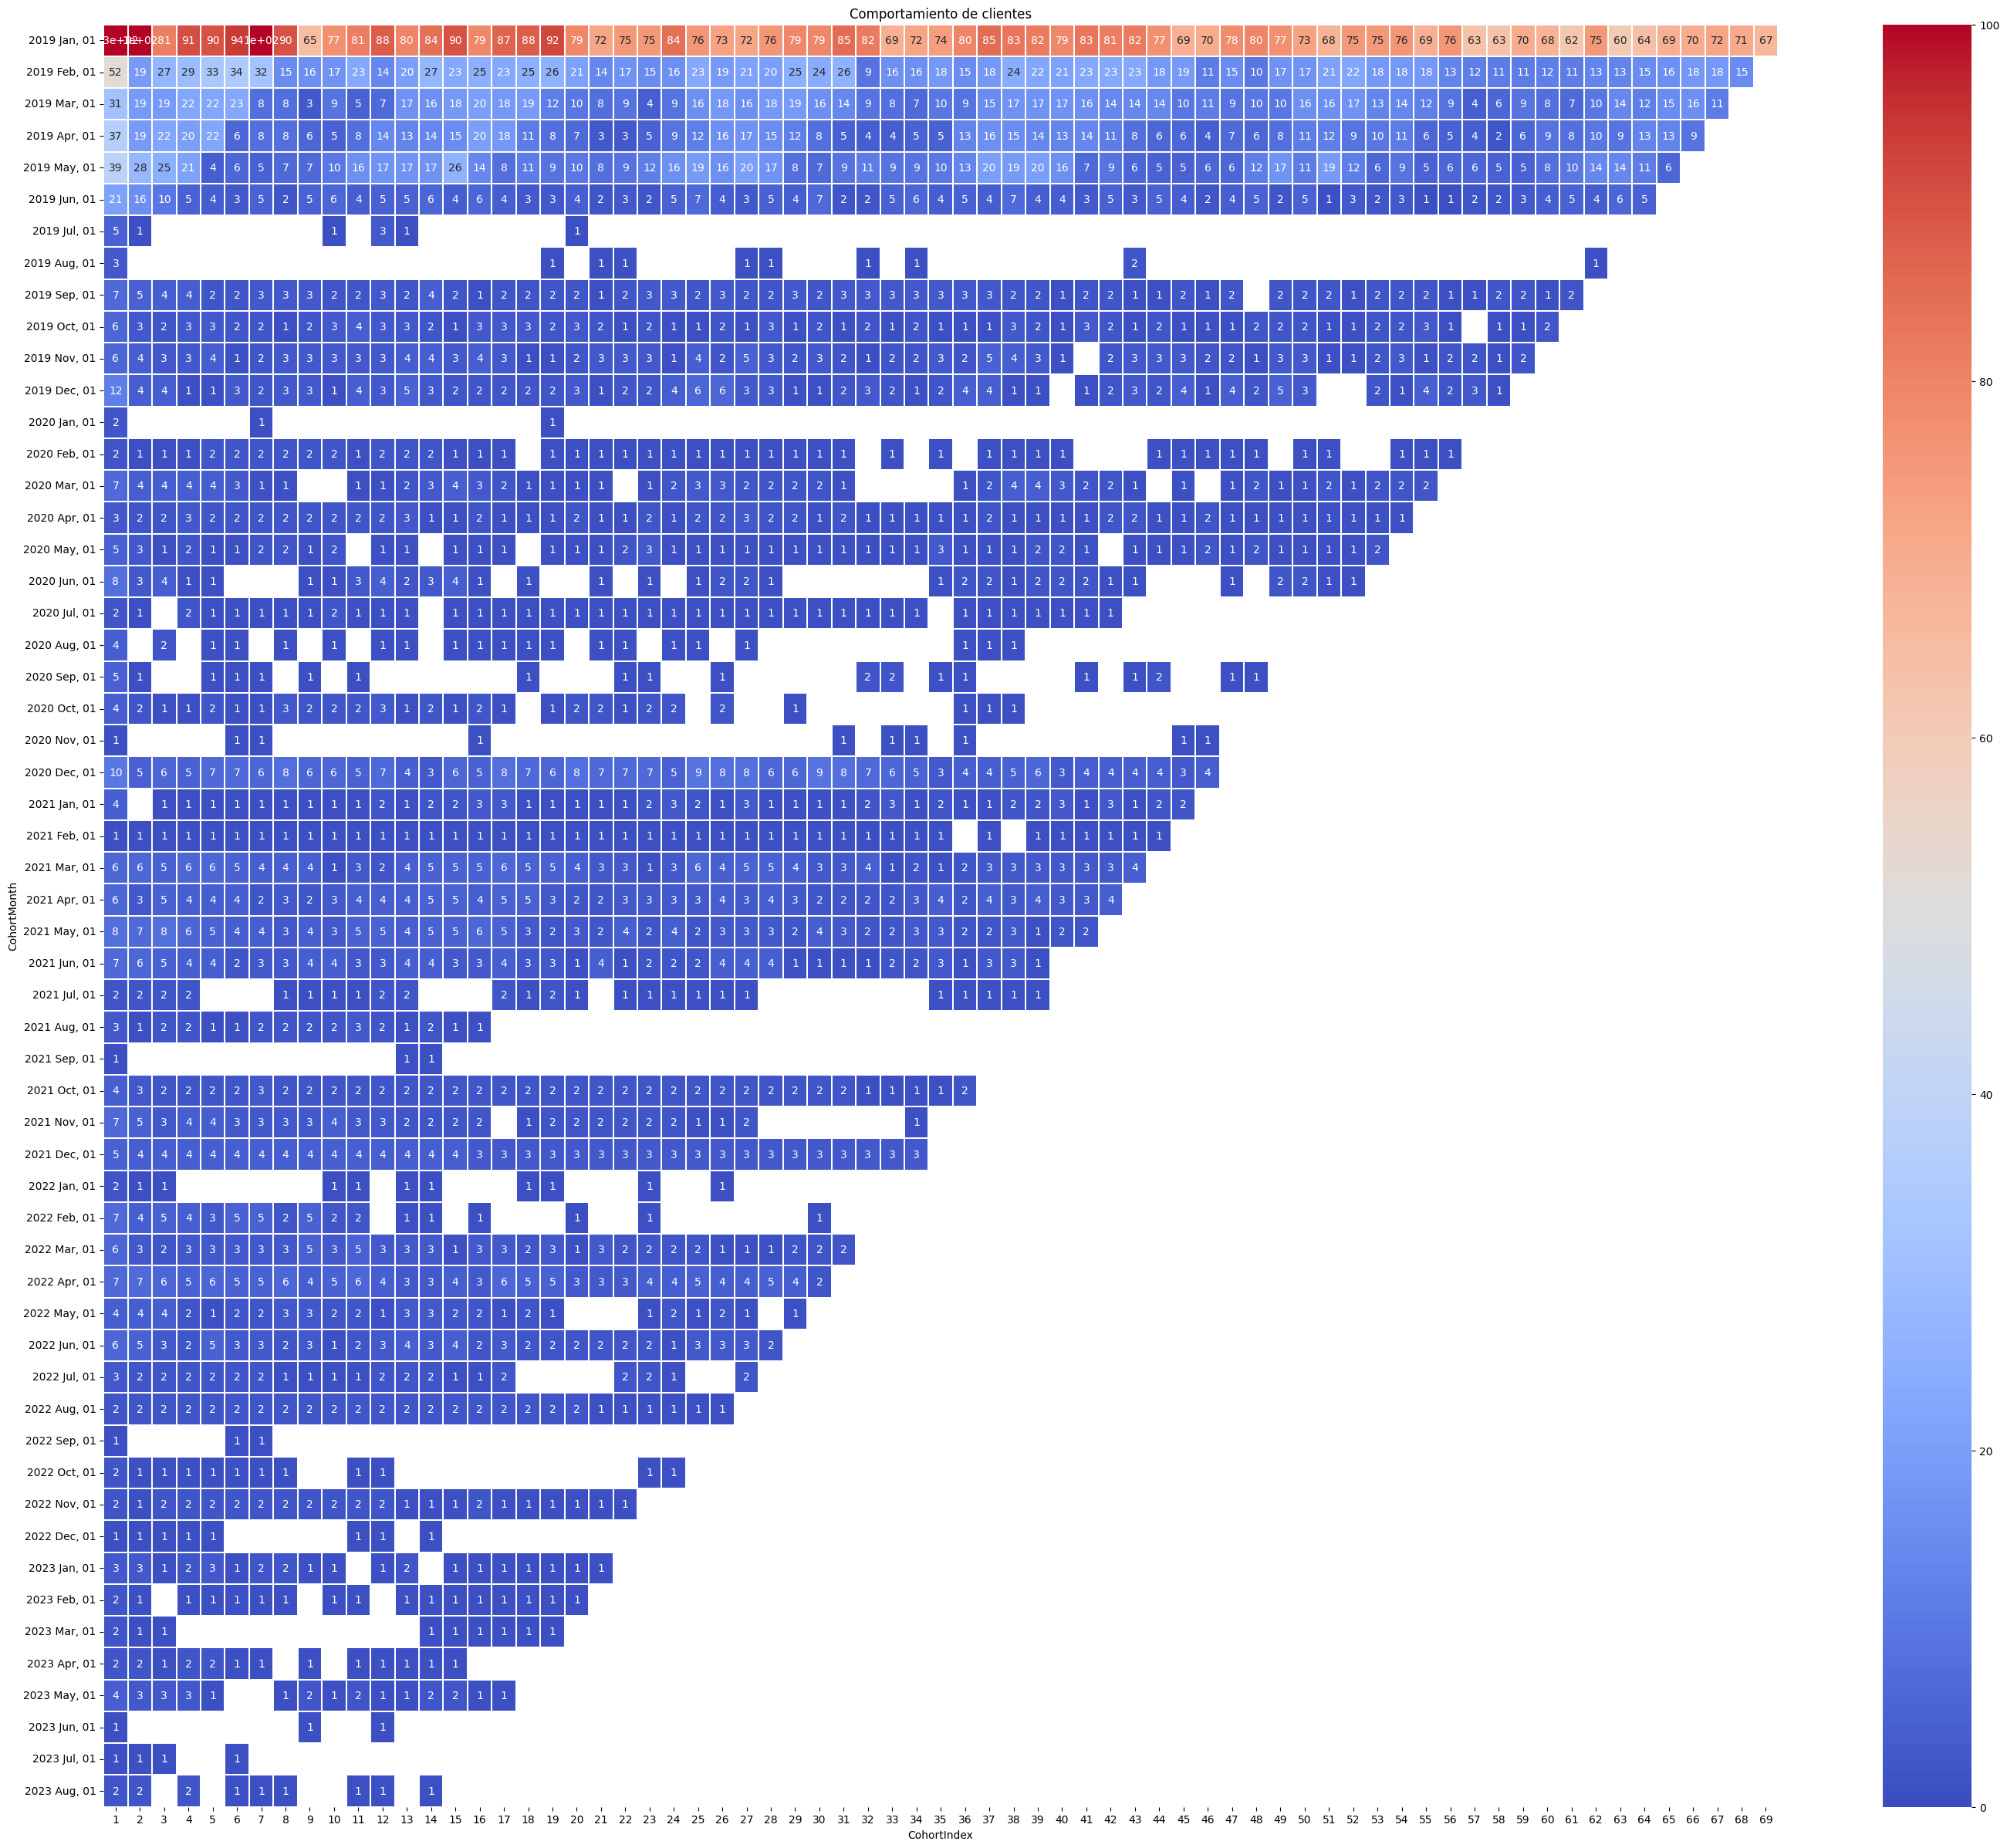

In [349]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(35, 30))
plt.title('Comportamiento de clientes')
sns.heatmap(data = cohort_counts,
            # xticklabels=df_clientes['CohortIndex'].unique(),
            yticklabels=df_clientes['CohortMonth'].sort_values().apply(lambda x: x.strftime("%Y %b, %d")).unique(),
            annot=True,
            linewidths=.2,
            cmap='coolwarm',
            vmin=0,
            vmax=100)

plt.show()

Store the first column as cohort_sizes

In [350]:
cohort_sizes = cohort_counts.iloc[:,0]

In [351]:
# Divide all values in the cohort_counts table by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)


In [352]:
# Review the retention table
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,60,61,62,63,64,65,66,67,68,69
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2019-01-01,100.0,77.5,62.8,70.5,69.8,72.9,78.3,69.8,50.4,59.7,...,52.7,48.1,58.1,46.5,49.6,53.5,54.3,55.8,55.0,51.9
2019-02-01,100.0,36.5,51.9,55.8,63.5,65.4,61.5,28.8,30.8,32.7,...,23.1,21.2,25.0,25.0,28.8,30.8,34.6,34.6,28.8,NaN
2019-03-01,100.0,61.3,61.3,71.0,71.0,74.2,25.8,25.8,9.7,29.0,...,25.8,22.6,32.3,45.2,38.7,48.4,51.6,35.5,NaN,NaN
2019-04-01,100.0,51.4,59.5,54.1,59.5,16.2,21.6,21.6,16.2,13.5,...,24.3,21.6,27.0,24.3,35.1,35.1,24.3,NaN,NaN,NaN
2019-05-01,100.0,71.8,64.1,53.8,10.3,15.4,12.8,17.9,17.9,25.6,...,20.5,25.6,35.9,35.9,28.2,15.4,NaN,NaN,NaN,NaN
2019-06-01,100.0,76.2,47.6,23.8,19.0,14.3,23.8,9.5,23.8,28.6,...,19.0,23.8,19.0,28.6,23.8,NaN,NaN,NaN,NaN,NaN
2019-07-01,100.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,100.0,71.4,57.1,57.1,28.6,28.6,42.9,42.9,42.9,28.6,...,14.3,28.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


El siguiente gráfico muestra la retención de clientes de cada cohorte (grupo), en pocas palabras, mide el porcentaje de los clientes de cada grupo que han regresado en los meses siguientes.

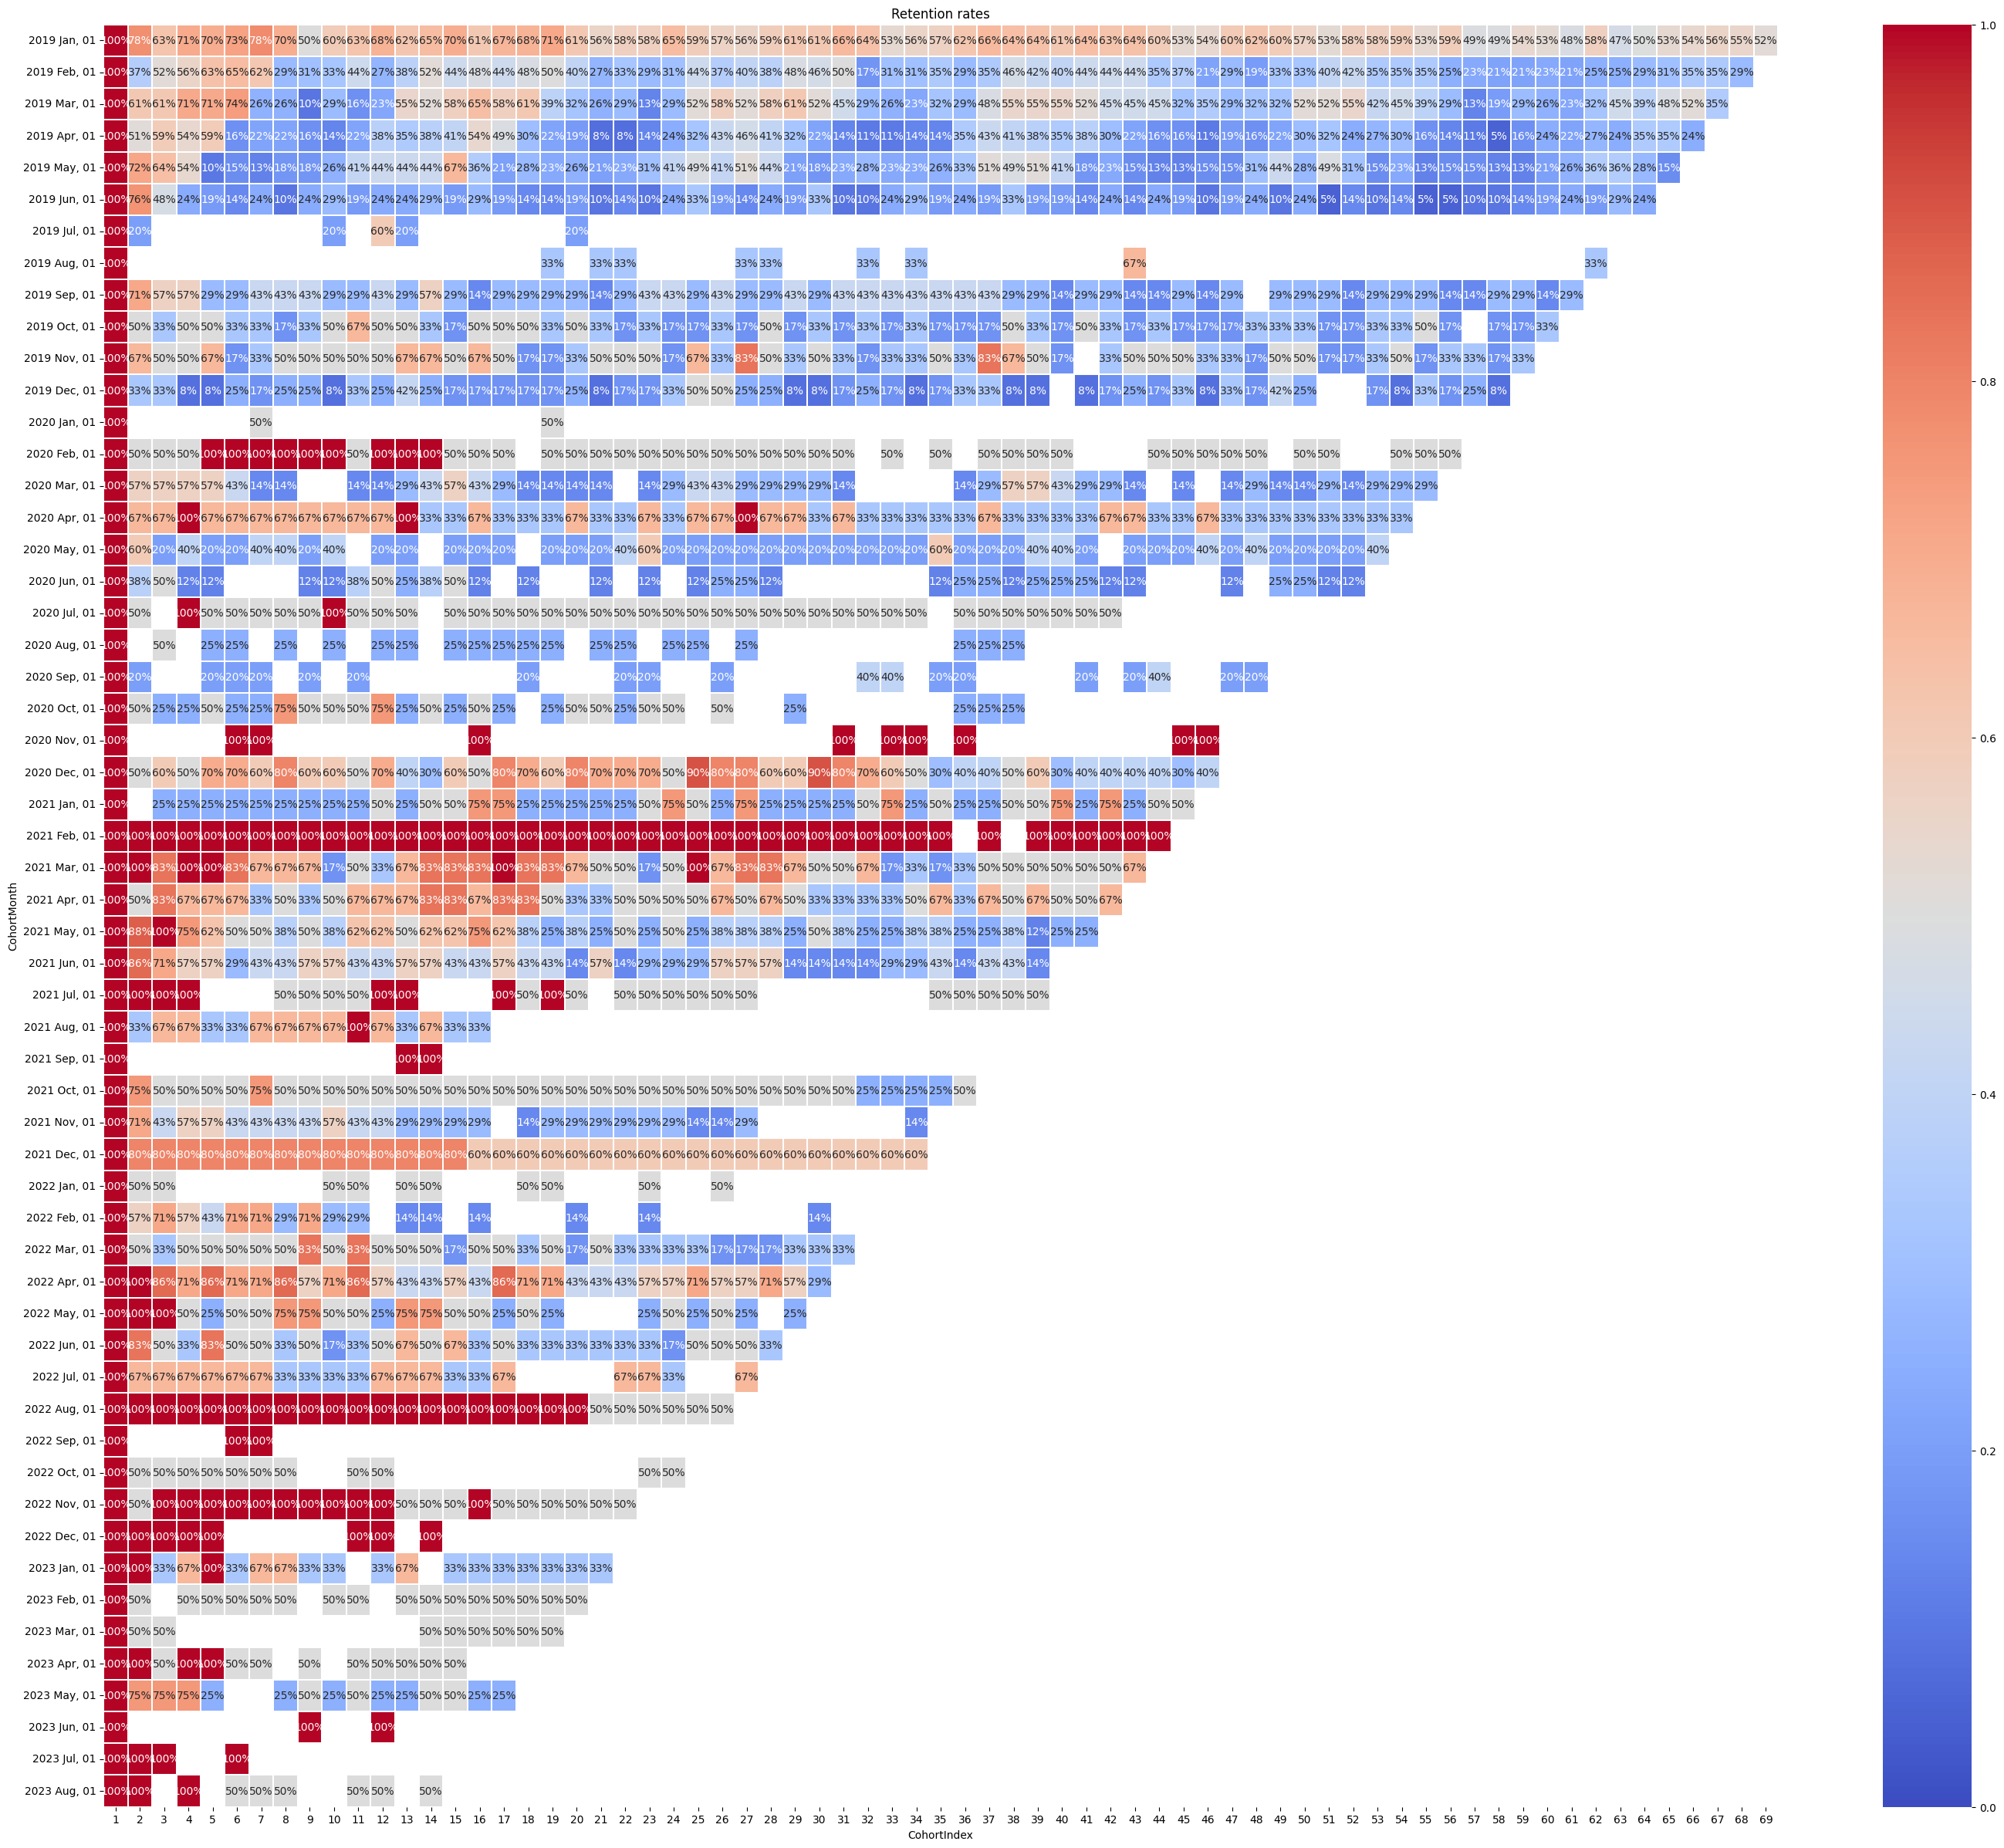

In [353]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(35, 30))
plt.title('Retention rates')
sns.heatmap(data = retention,
            # xticklabels=df_clientes['CohortIndex'].unique(),
            yticklabels=df_clientes['CohortMonth'].sort_values().apply(lambda x: x.strftime("%Y %b, %d")).unique(),
            annot=True,
            linewidths=.2,
            fmt='.0%',
            cmap='coolwarm',
            vmin=0,
            vmax=1)
plt.savefig(r'C:\Users\carlo\OneDrive\Documentos\Tesis Carlos Espadin\Gráficas e Imagenes\Cohort.png')
plt.show()

In [354]:
# retention['names']=retention.index
retention.to_csv('./Output/ChurnbyCohorts.csv', index=True)

In [355]:
df_clientes['CohortMonth'].apply(lambda x: x.strftime("%d %b, %Y"))

863       01 Jan, 2019
865       01 Jan, 2019
866       01 Jan, 2019
867       01 Jan, 2019
868       01 Jan, 2019
              ...     
152505    01 Mar, 2019
152506    01 Mar, 2019
152507    01 Mar, 2019
152500    01 Sep, 2019
152454    01 Dec, 2020
Name: CohortMonth, Length: 184551, dtype: object

In [356]:
df_clientes.rename(columns={'Fecha de Facturacion_x': 'Fecha de Facturacion'}, inplace=True)

In [357]:
df_clientes = df_clientes.sort_values(['bp_id', 'Fecha de Facturacion'])

<Axes: >

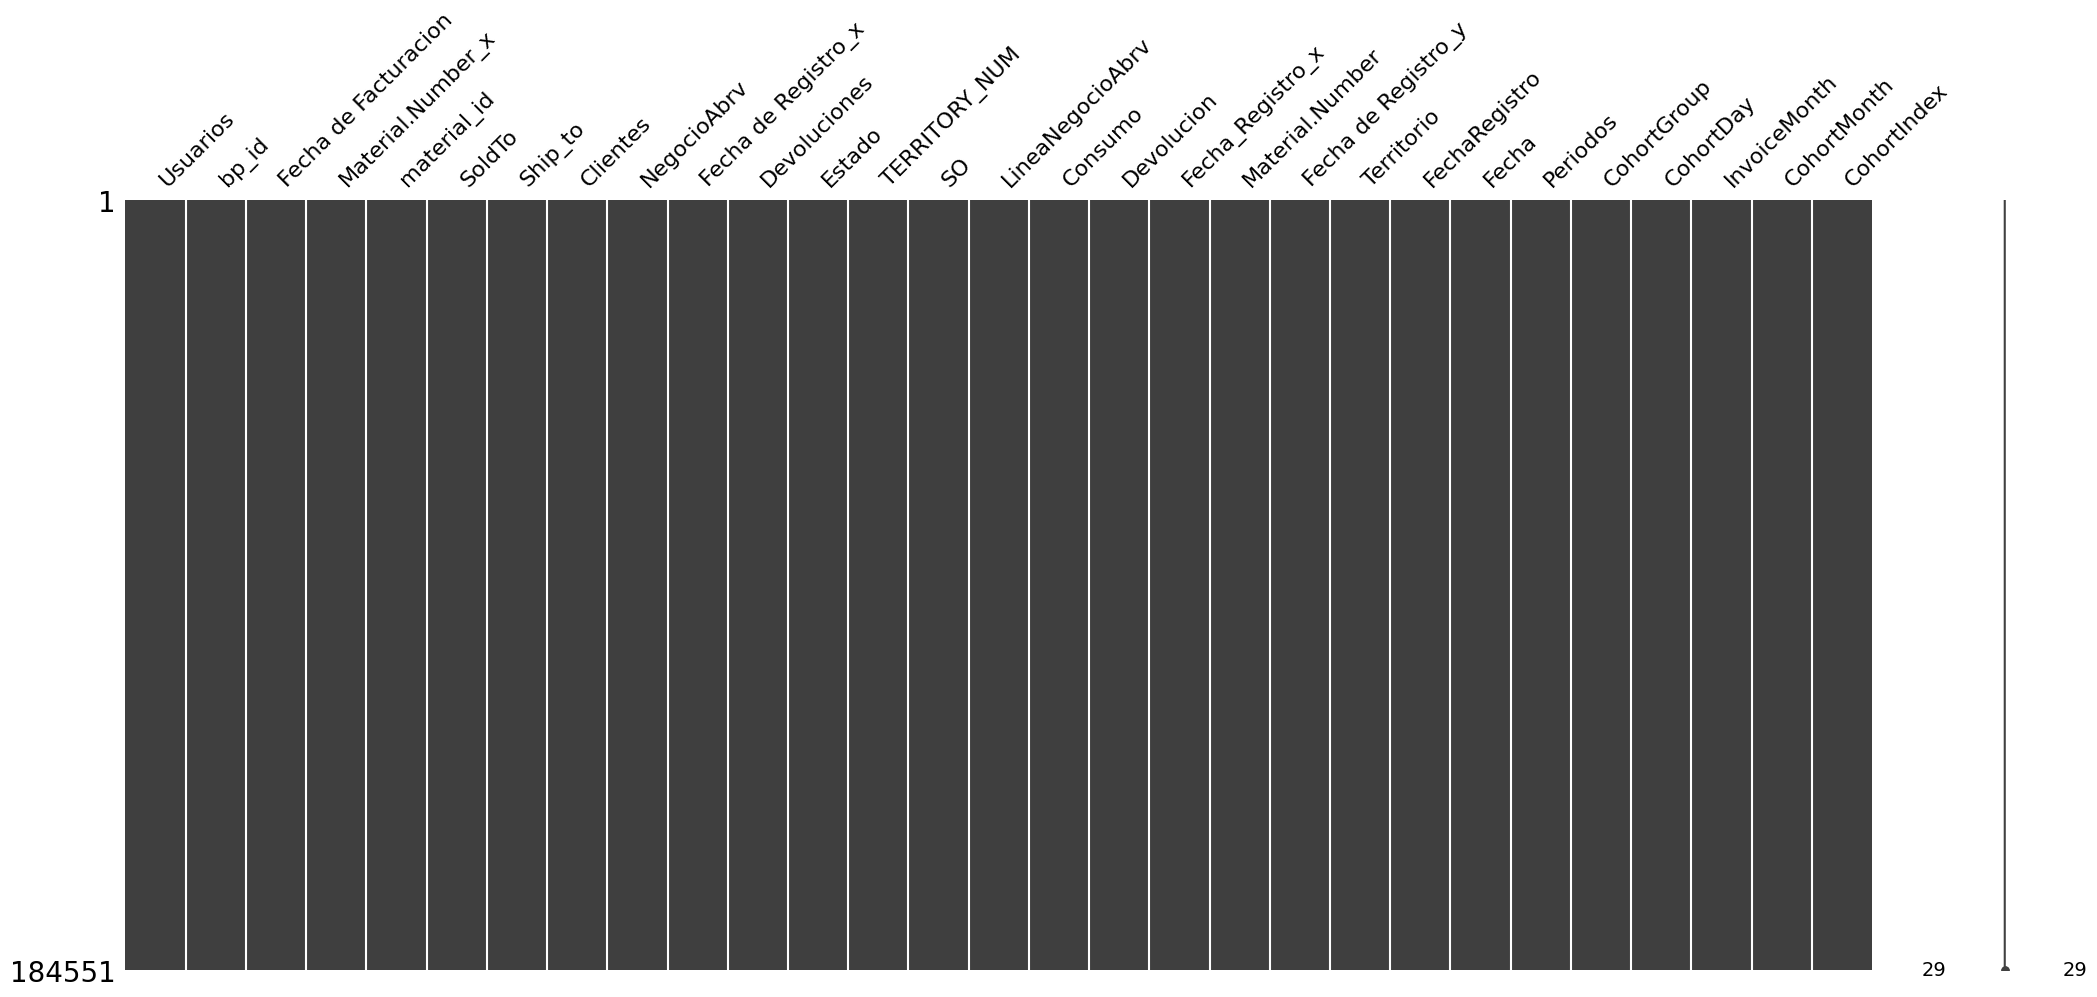

In [358]:
msno.matrix(df_clientes)

## Data manipulation.

Estas son algunas de las variables categoricas y númericas que estaremos Calculando:

*   Compró ese mes.
*   Media movil de compró
*   Media movil de consumo por SoldTo.
*   Media movil de volumen por SoldTo
*   Diferencia en meses entre la última compra y ahora.
*   Frecuencia de compra.

Calculamos la frecuencia de compra:

### Armamos la variable Date_Last para calcular la ultima fecha de facturacion.

<Axes: >

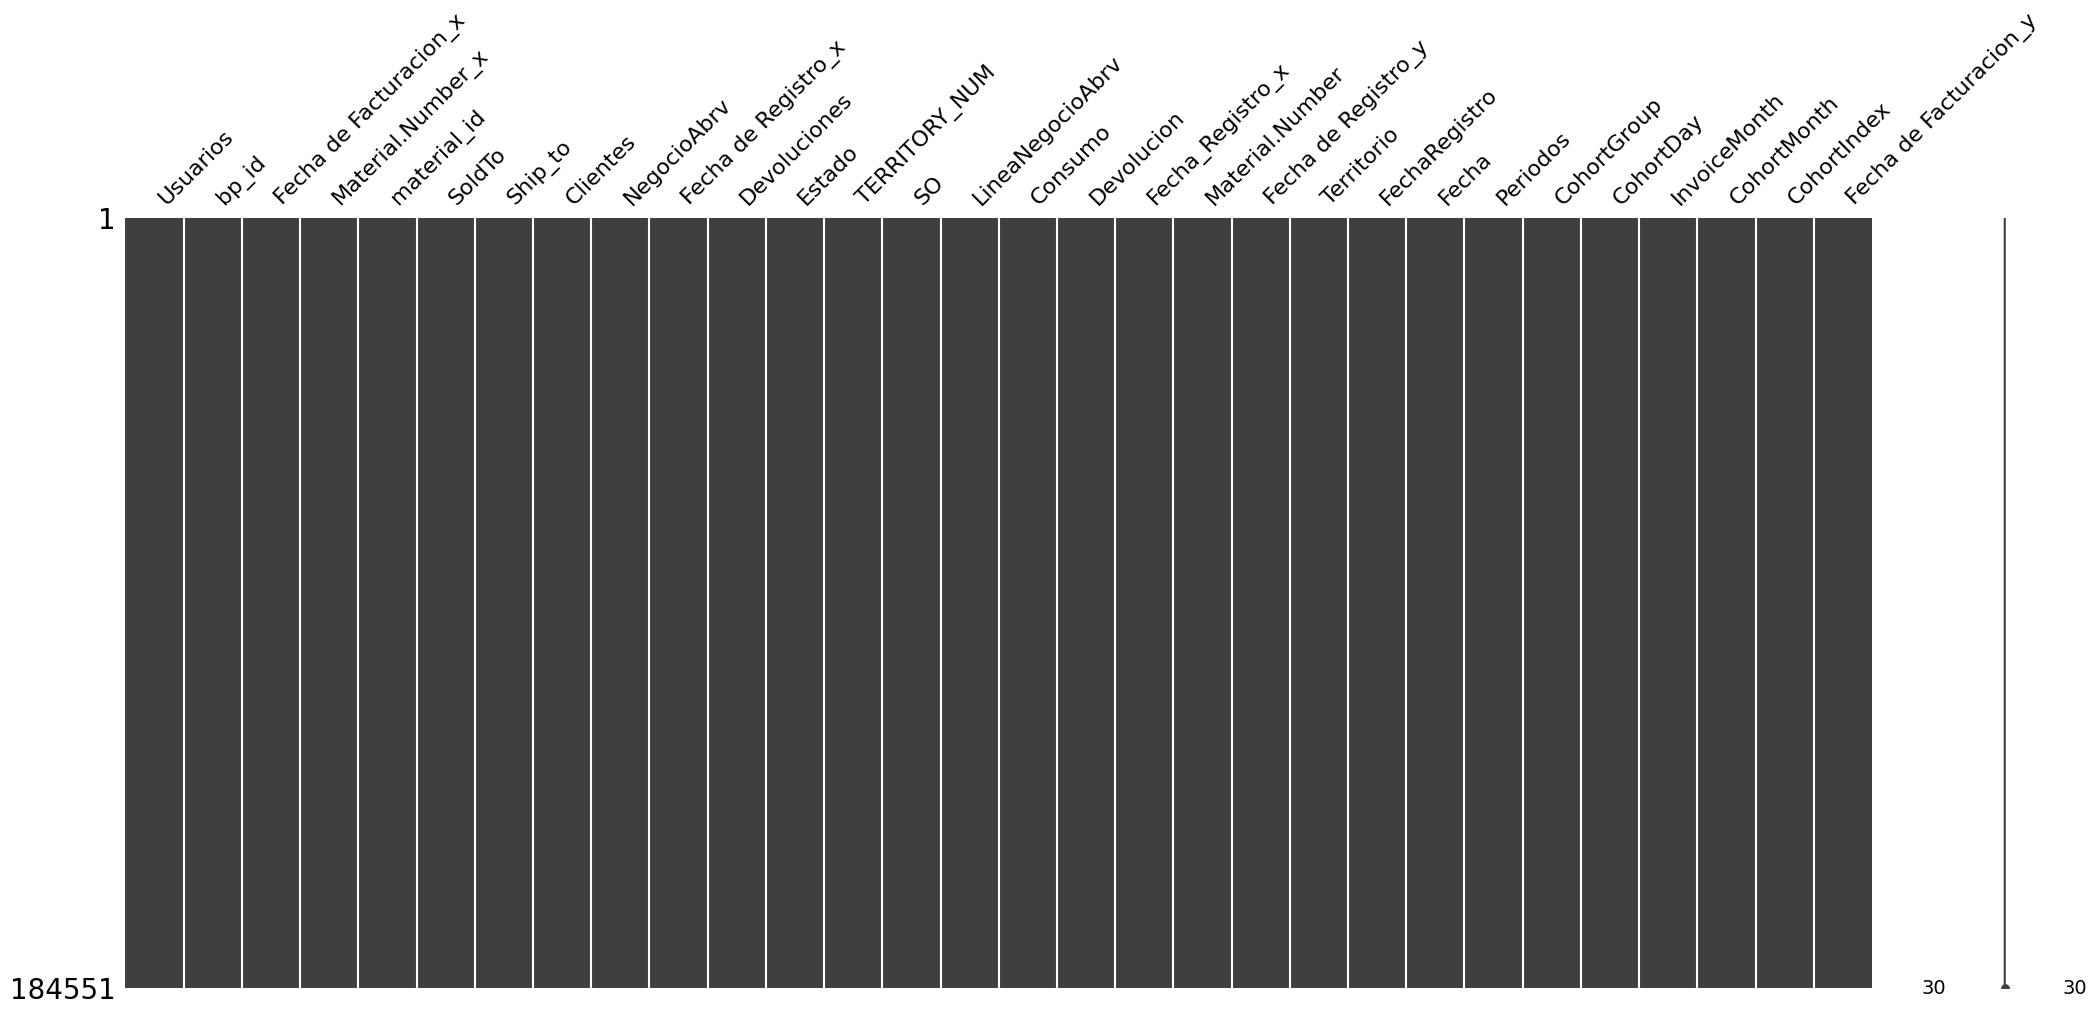

In [359]:
Date_Last = df_clientes.groupby(['bp_id'])['Fecha de Facturacion'].max().reset_index()
df_clientes = df_clientes.merge(Date_Last, on='bp_id', how='left')
msno.matrix(df_clientes)

In [360]:
df_clientes.rename(columns={'Fecha de Facturacion_y': 'Date_Last'}, inplace=True)
df_clientes

,Usuarios,bp_id,Fecha de Facturacion_x,Material.Number_x,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro_x,...,Territorio,FechaRegistro,Fecha,Periodos,CohortGroup,CohortDay,InvoiceMonth,CohortMonth,CohortIndex,Date_Last
0,21107235,21107235,2019-04-09,AMISTAR 50WG,1001368,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,A5442B,17/11/2017,2019-04-09,2019-04,2019-04,05/04/2022,2019-04-01,2019-04-01,1,2023-03-08
1,21107235,21107235,2019-04-09,MARVEL 13.2% WS,20222,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,A5442B,17/11/2017,2019-04-09,2019-04,2019-04,05/04/2022,2019-04-01,2019-04-01,1,2023-03-08
2,21107235,21107235,2019-04-09,CALLISTOXTRA,59328,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,A5442B,17/11/2017,2019-04-09,2019-04,2019-04,05/04/2022,2019-04-01,2019-04-01,1,2023-03-08
3,21107235,21107235,2019-04-09,GRAMOXONE 20% WS,32717,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,A5442B,17/11/2017,2019-04-09,2019-04,2019-04,05/04/2022,2019-04-01,2019-04-01,1,2023-03-08
4,21107235,21107235,2019-04-09,TECTO 60% PH,23930,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,A5442B,17/11/2017,2019-04-09,2019-04,2019-04,05/04/2022,2019-04-01,2019-04-01,1,2023-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184546,21535330,21535330,2024-03-27,CRUISER MAXX POTATO,65439,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,A5442O,06/07/2022,2024-03-27,2024-03,2023-05,07/06/2023,2024-03-01,2023-05-01,11,2024-04-26
184547,21535330,21535330,2024-03-27,GESAPRIM CALIBRE 90,71542,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,A5442O,06/07/2022,2024-03-27,2024-03,2023-05,07/06/2023,2024-03-01,2023-05-01,11,2024-04-26
184548,21535330,21535330,2024-04-11,ELUMIS,67214,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,A5442O,06/07/2022,2024-04-11,2024-04,2023-05,07/06/2023,2024-04-01,2023-05-01,12,2024-04-26
184549,21535330,21535330,2024-04-12,PEAK TURBO,62225,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,A5442O,06/07/2022,2024-04-12,2024-04,2023-05,07/06/2023,2024-04-01,2023-05-01,12,2024-04-26


## Se agrega el dato de Temporada.

In [361]:
df_clientes['Temporada_Temp'] = np.where(
    (
        (df_clientes['Fecha de Facturacion_x'].dt.month == 9) |
        (df_clientes['Fecha de Facturacion_x'].dt.month == 10) |
        (df_clientes['Fecha de Facturacion_x'].dt.month == 11) |
        (df_clientes['Fecha de Facturacion_x'].dt.month == 12) |
        (df_clientes['Fecha de Facturacion_x'].dt.month == 1) |
        (df_clientes['Fecha de Facturacion_x'].dt.month == 2) |
        (df_clientes['Fecha de Facturacion_x'].dt.month == 3)
    ),
    'OI',
    'PV'
)
Temporadas = df_clientes.groupby('bp_id')['Temporada_Temp'].apply(lambda x: x.mode().iloc[0]).reset_index()

df_clientes = df_clientes.merge(Temporadas, on = 'bp_id', how='left')
df_clientes.rename(columns={'Temporada_Temp_y': 'Temporada'}, inplace=True)

df_clientes


,Usuarios,bp_id,Fecha de Facturacion_x,Material.Number_x,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro_x,...,Fecha,Periodos,CohortGroup,CohortDay,InvoiceMonth,CohortMonth,CohortIndex,Date_Last,Temporada_Temp_x,Temporada
0,21107235,21107235,2019-04-09,AMISTAR 50WG,1001368,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-09,2019-04,2019-04,05/04/2022,2019-04-01,2019-04-01,1,2023-03-08,PV,OI
1,21107235,21107235,2019-04-09,MARVEL 13.2% WS,20222,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-09,2019-04,2019-04,05/04/2022,2019-04-01,2019-04-01,1,2023-03-08,PV,OI
2,21107235,21107235,2019-04-09,CALLISTOXTRA,59328,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-09,2019-04,2019-04,05/04/2022,2019-04-01,2019-04-01,1,2023-03-08,PV,OI
3,21107235,21107235,2019-04-09,GRAMOXONE 20% WS,32717,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-09,2019-04,2019-04,05/04/2022,2019-04-01,2019-04-01,1,2023-03-08,PV,OI
4,21107235,21107235,2019-04-09,TECTO 60% PH,23930,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-09,2019-04,2019-04,05/04/2022,2019-04-01,2019-04-01,1,2023-03-08,PV,OI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184546,21535330,21535330,2024-03-27,CRUISER MAXX POTATO,65439,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2024-03-27,2024-03,2023-05,07/06/2023,2024-03-01,2023-05-01,11,2024-04-26,OI,OI
184547,21535330,21535330,2024-03-27,GESAPRIM CALIBRE 90,71542,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2024-03-27,2024-03,2023-05,07/06/2023,2024-03-01,2023-05-01,11,2024-04-26,OI,OI
184548,21535330,21535330,2024-04-11,ELUMIS,67214,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2024-04-11,2024-04,2023-05,07/06/2023,2024-04-01,2023-05-01,12,2024-04-26,PV,OI
184549,21535330,21535330,2024-04-12,PEAK TURBO,62225,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2024-04-12,2024-04,2023-05,07/06/2023,2024-04-01,2023-05-01,12,2024-04-26,PV,OI


Analisis de Cohorth por temporada

In [362]:
df_clientes['Temporada_label'] = df_clientes['Fecha de Facturacion_x'].dt.year.astype(str) +"|"+df_clientes['Temporada_Temp_x']
df_clientes['Temporada_label'] 


0         2019|PV
1         2019|PV
2         2019|PV
3         2019|PV
4         2019|PV
           ...   
184546    2024|OI
184547    2024|OI
184548    2024|PV
184549    2024|PV
184550    2024|PV
Name: Temporada_label, Length: 184551, dtype: object

In [363]:
# Corrección del código
df_clientes['Index_Temp_Coho'] = df_clientes['Temporada_label'].apply(lambda x: 0 if x == '2020|OI' else (
                                                                        1 if x == '2020|PV' else (
                                                                            2 if x == '2021|OI' else (
                                                                                3 if x == '2021|PV' else (
                                                                                    4 if x == '2022|OI' else (
                                                                                        5 if x == '2022|PV' else (
                                                                                            6 if x == '2023|OI' else (
                                                                                                7 if x == '2023|PV' else (
                                                                                                    8 if x == '2024|OI' else 9
                                                                                                )
                                                                                            )
                                                                                        )
                                                                                    )
                                                                                )
                                                                            )
                                                                        )
                                                                    )
                                                                )
df_clientes['Index_Temp_Coho']

0         9
1         9
2         9
3         9
4         9
         ..
184546    8
184547    8
184548    9
184549    9
184550    9
Name: Index_Temp_Coho, Length: 184551, dtype: int64

In [364]:
df_clientes['Temporada_label'].sort_values().unique()

array(['2019|OI', '2019|PV', '2020|OI', '2020|PV', '2021|OI', '2021|PV',
       '2022|OI', '2022|PV', '2023|OI', '2023|PV', '2024|OI', '2024|PV'],
      dtype=object)

In [365]:
df_clientes['CohortIndex_Temp'] = df_clientes['Index_Temp_Coho'] + 1

In [366]:
df_clientes

,Usuarios,bp_id,Fecha de Facturacion_x,Material.Number_x,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro_x,...,CohortDay,InvoiceMonth,CohortMonth,CohortIndex,Date_Last,Temporada_Temp_x,Temporada,Temporada_label,Index_Temp_Coho,CohortIndex_Temp
0,21107235,21107235,2019-04-09,AMISTAR 50WG,1001368,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,05/04/2022,2019-04-01,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10
1,21107235,21107235,2019-04-09,MARVEL 13.2% WS,20222,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,05/04/2022,2019-04-01,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10
2,21107235,21107235,2019-04-09,CALLISTOXTRA,59328,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,05/04/2022,2019-04-01,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10
3,21107235,21107235,2019-04-09,GRAMOXONE 20% WS,32717,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,05/04/2022,2019-04-01,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10
4,21107235,21107235,2019-04-09,TECTO 60% PH,23930,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,05/04/2022,2019-04-01,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184546,21535330,21535330,2024-03-27,CRUISER MAXX POTATO,65439,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,07/06/2023,2024-03-01,2023-05-01,11,2024-04-26,OI,OI,2024|OI,8,9
184547,21535330,21535330,2024-03-27,GESAPRIM CALIBRE 90,71542,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,07/06/2023,2024-03-01,2023-05-01,11,2024-04-26,OI,OI,2024|OI,8,9
184548,21535330,21535330,2024-04-11,ELUMIS,67214,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,07/06/2023,2024-04-01,2023-05-01,12,2024-04-26,PV,OI,2024|PV,9,10
184549,21535330,21535330,2024-04-12,PEAK TURBO,62225,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,07/06/2023,2024-04-01,2023-05-01,12,2024-04-26,PV,OI,2024|PV,9,10


In [367]:
grouping = df_clientes.groupby(['Temporada_Temp_x', 'CohortIndex_Temp'])
cohort_data = grouping['bp_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='Temporada_Temp_x',
                                columns='CohortIndex_Temp',
                                values='bp_id')
cohort_counts

CohortIndex_Temp,1,2,3,4,5,6,7,8,9,10
Temporada_Temp_x,,,,,,,,,,
OI,298.0,NaN,308.0,NaN,333.0,NaN,314.0,NaN,250.0,282.0
PV,NaN,285.0,NaN,302.0,NaN,323.0,NaN,304.0,NaN,389.0


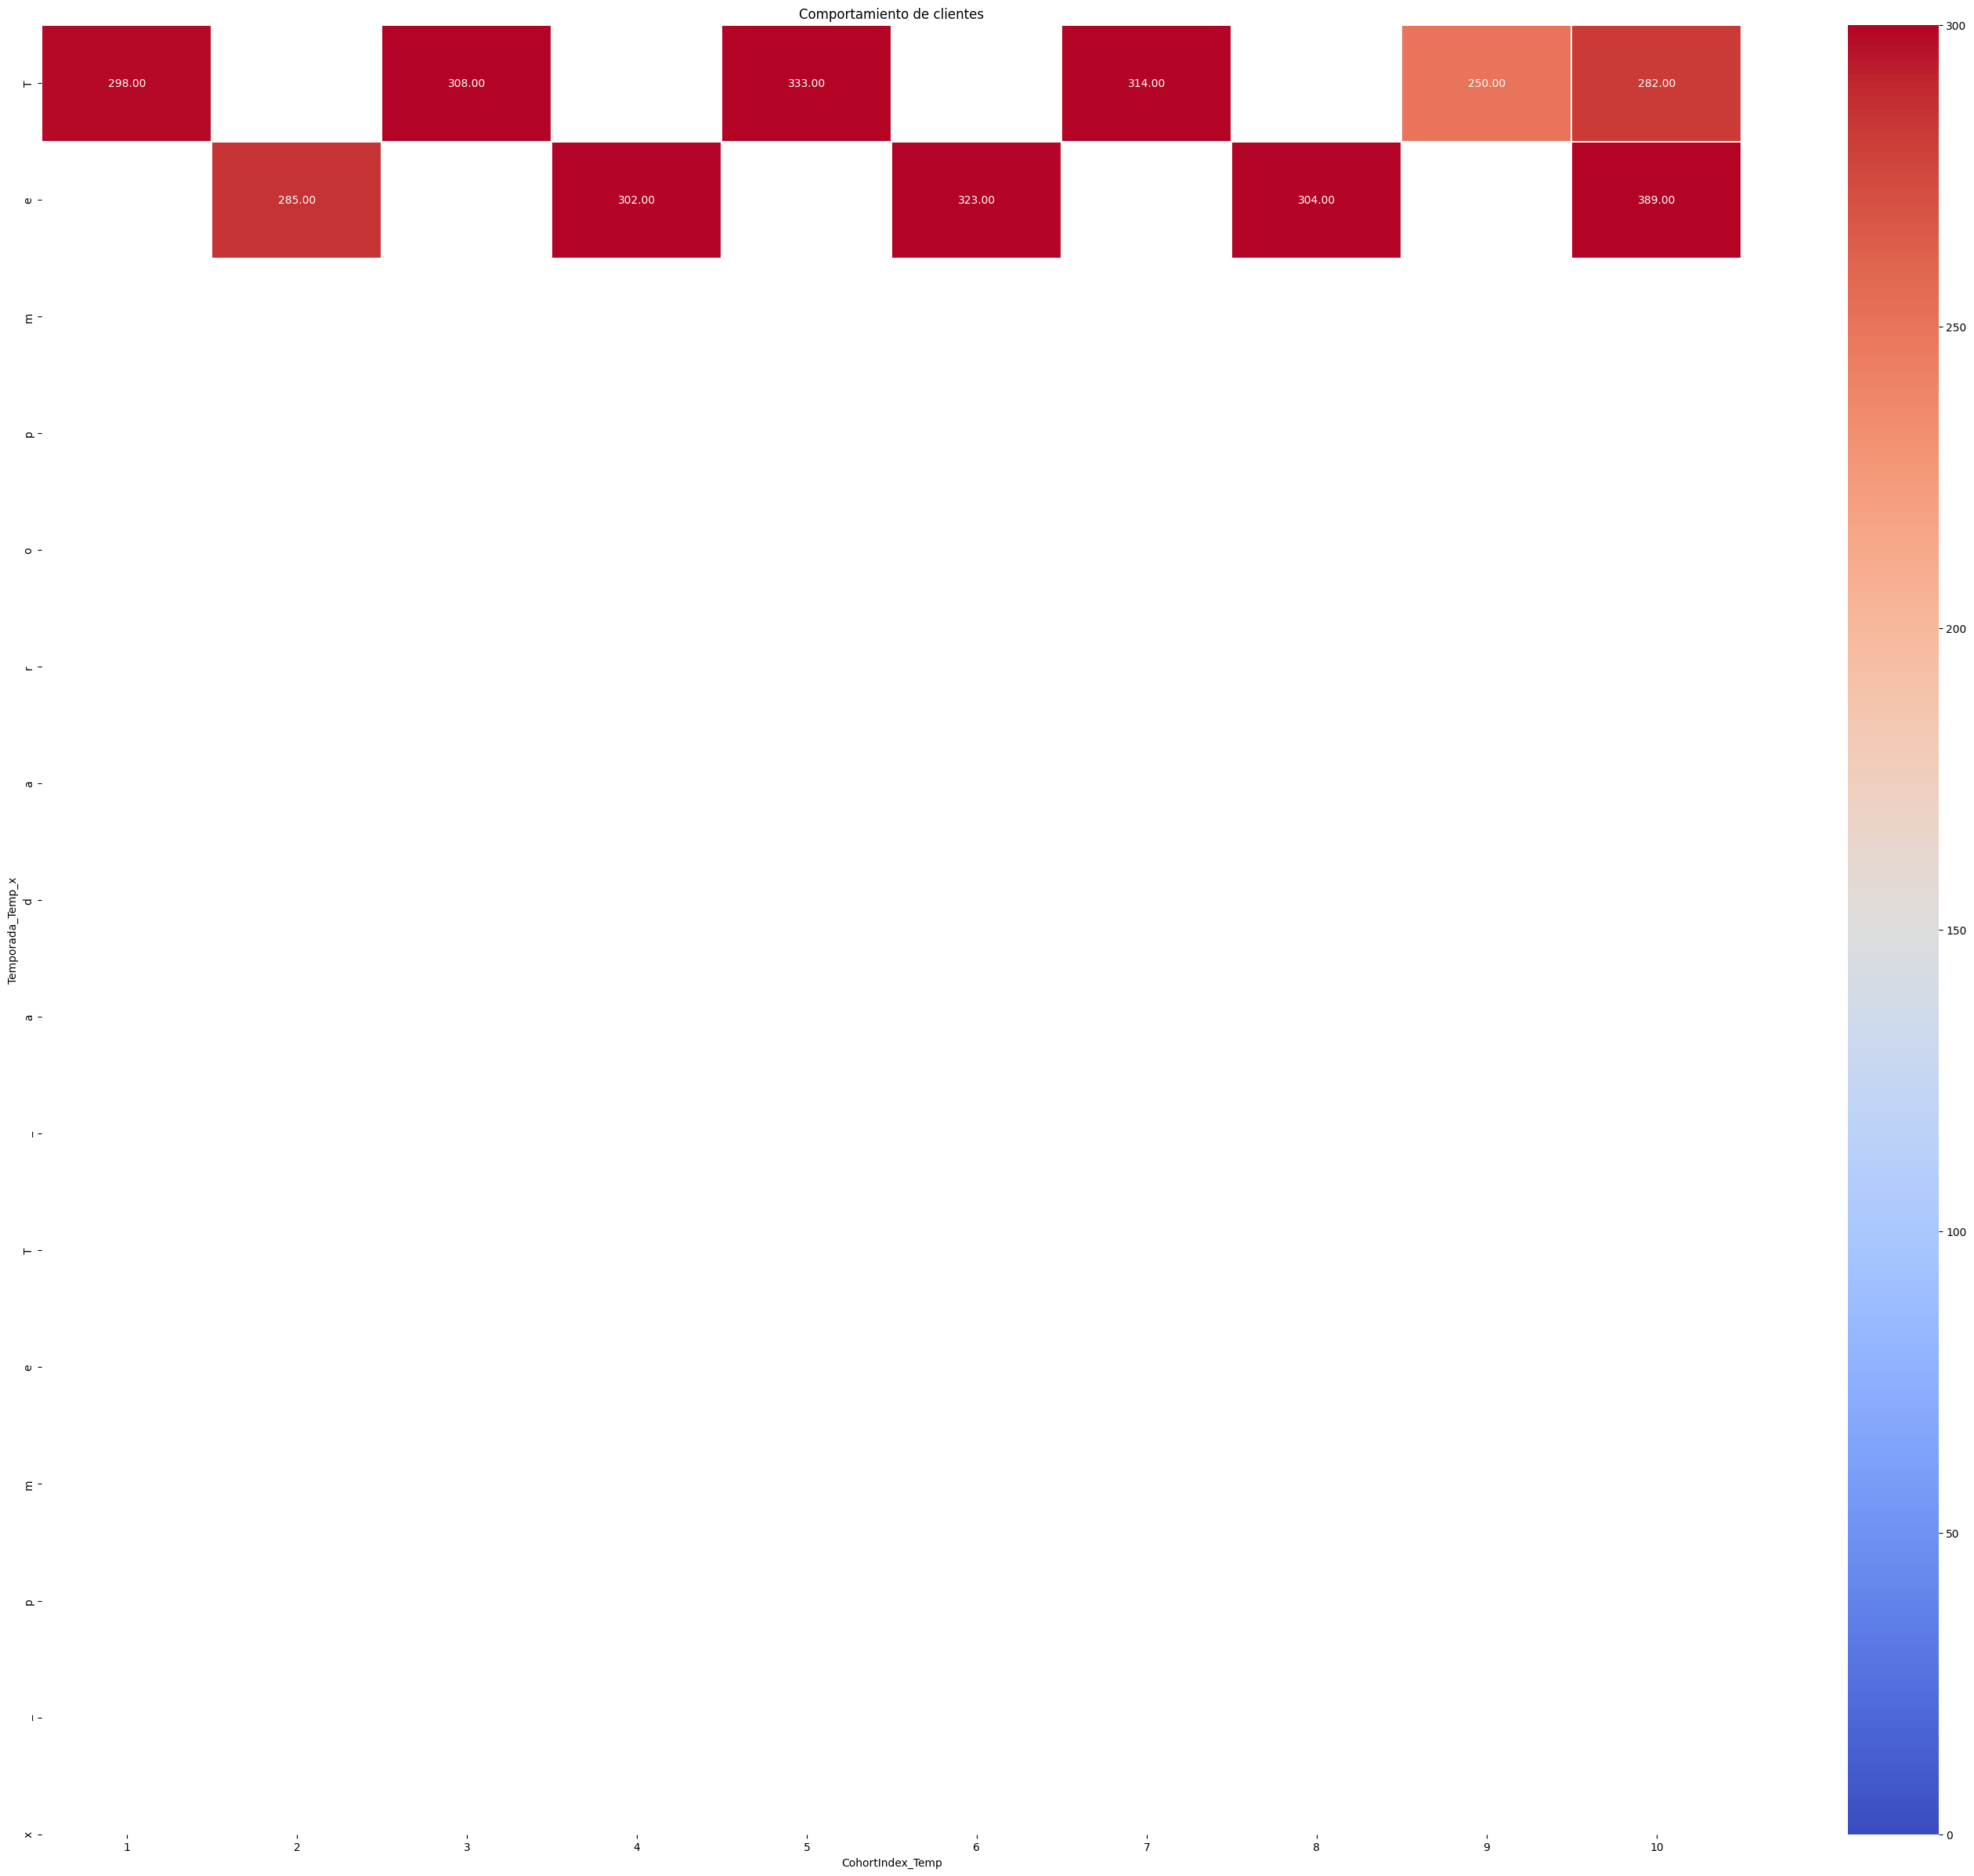

In [368]:
plt.figure(figsize=(35, 30))
plt.title('Comportamiento de clientes')
sns.heatmap(data = cohort_counts,
            # xticklabels=df_clientes['CohortIndex'].unique(),
            yticklabels='Temporada_Temp_x',
            annot=True,
            linewidths=.2,
            fmt='.2f',
            cmap='coolwarm',
            vmin=0,
            vmax=300)
plt.show()

### Se agrega el dato de Organizacion de ventas

In [369]:
SO_Temp = df_clientes.groupby('bp_id')['SO'].apply(lambda x: x.mode().iloc[0]).reset_index()
df_clientes = df_clientes.merge(SO_Temp, on = 'bp_id', how='left')
df_clientes.rename(columns={'SO_y': 'SO'}, inplace=True)

df_clientes

,Usuarios,bp_id,Fecha de Facturacion_x,Material.Number_x,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro_x,...,InvoiceMonth,CohortMonth,CohortIndex,Date_Last,Temporada_Temp_x,Temporada,Temporada_label,Index_Temp_Coho,CohortIndex_Temp,SO
0,21107235,21107235,2019-04-09,AMISTAR 50WG,1001368,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR
1,21107235,21107235,2019-04-09,MARVEL 13.2% WS,20222,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR
2,21107235,21107235,2019-04-09,CALLISTOXTRA,59328,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR
3,21107235,21107235,2019-04-09,GRAMOXONE 20% WS,32717,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR
4,21107235,21107235,2019-04-09,TECTO 60% PH,23930,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184546,21535330,21535330,2024-03-27,CRUISER MAXX POTATO,65439,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2024-03-01,2023-05-01,11,2024-04-26,OI,OI,2024|OI,8,9,3CR
184547,21535330,21535330,2024-03-27,GESAPRIM CALIBRE 90,71542,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2024-03-01,2023-05-01,11,2024-04-26,OI,OI,2024|OI,8,9,3CR
184548,21535330,21535330,2024-04-11,ELUMIS,67214,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2024-04-01,2023-05-01,12,2024-04-26,PV,OI,2024|PV,9,10,3CR
184549,21535330,21535330,2024-04-12,PEAK TURBO,62225,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2024-04-01,2023-05-01,12,2024-04-26,PV,OI,2024|PV,9,10,3CR


<Axes: >

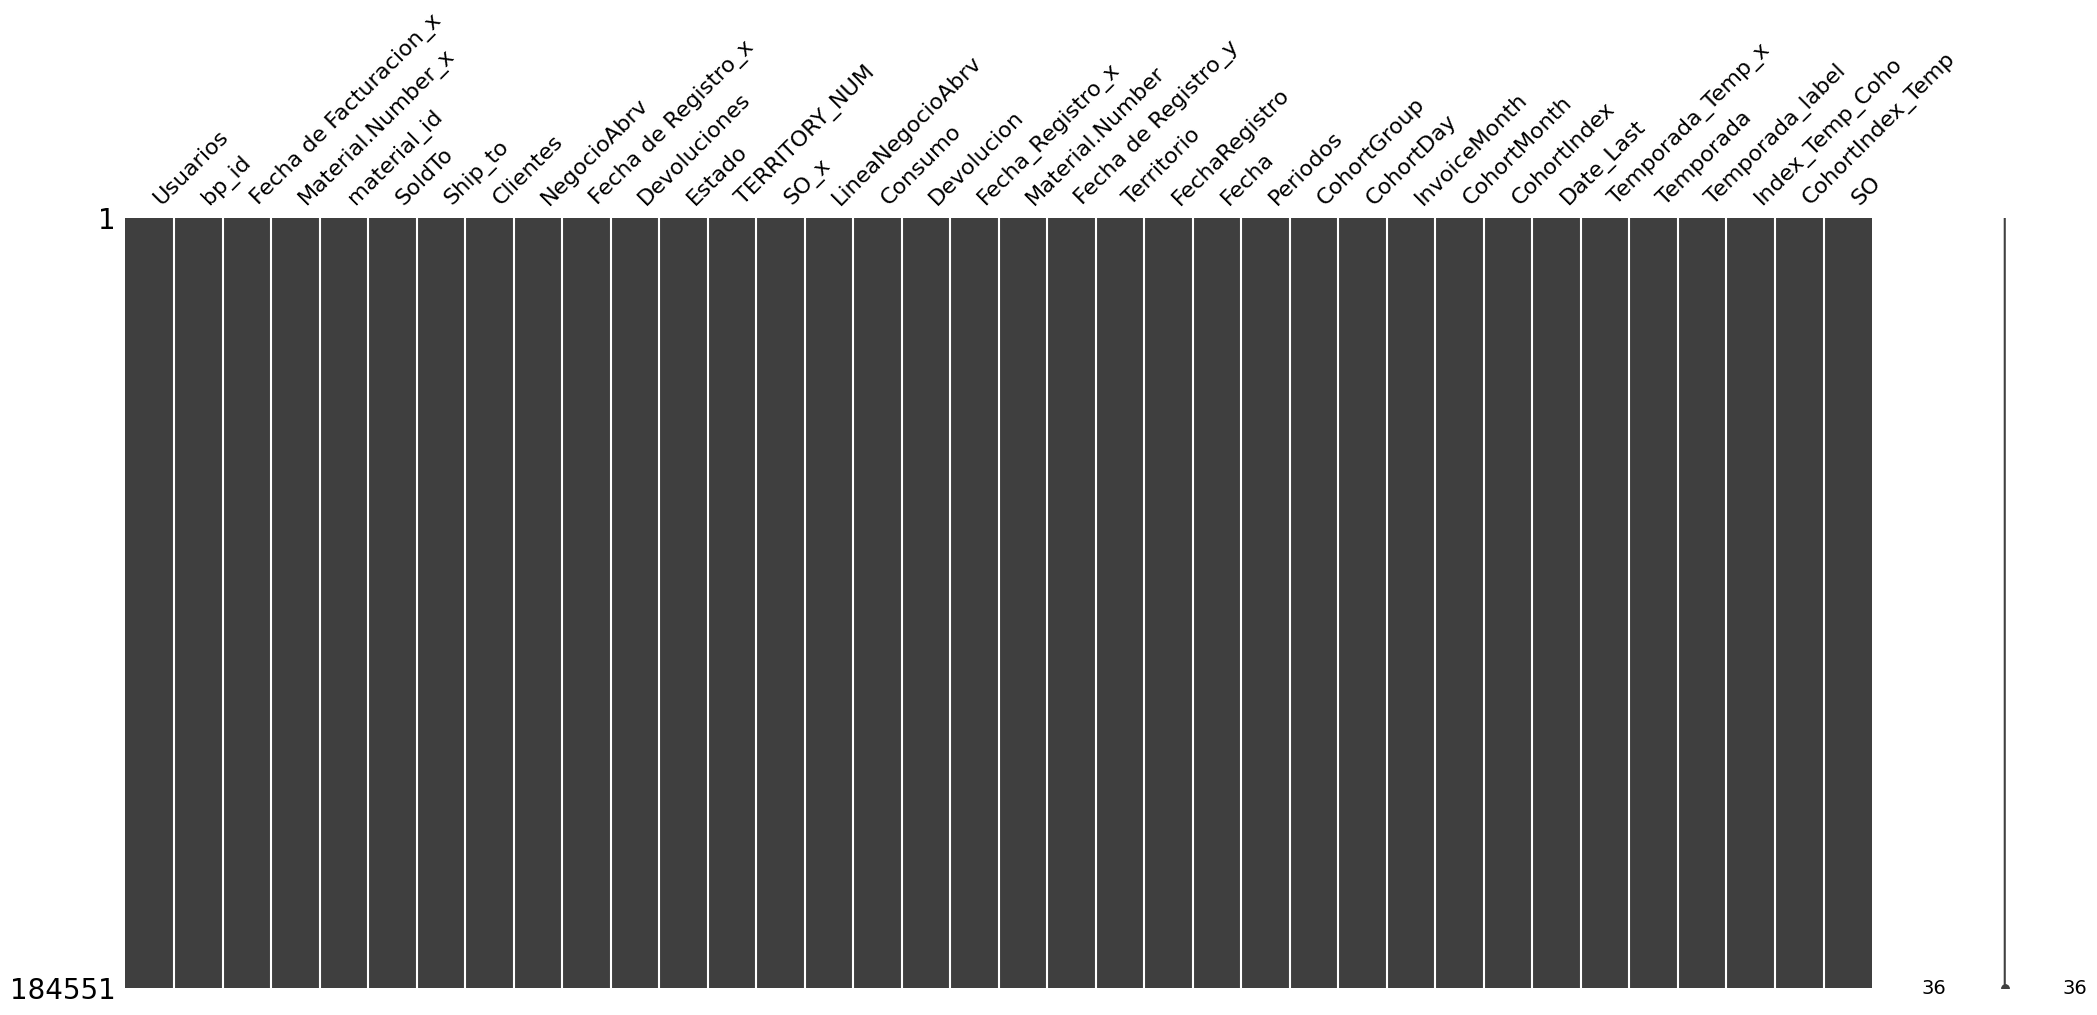

In [370]:
msno.matrix(df_clientes)

### Se agrega el dato de Linea Negocio

### Agrupa y encuentra la moda, manejando grupos vacíos o múltiples modas

In [371]:
LineaNeg = df_clientes.groupby('bp_id')['LineaNegocioAbrv'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

df_clientes = df_clientes.merge(LineaNeg, on = 'bp_id', how='left')
df_clientes.rename(columns={'SO_y': 'SO'}, inplace=True)
df_clientes.rename(columns={'LineaNegocioAbrv_y': 'Linea_Negocio'}, inplace=True)
df_clientes

,Usuarios,bp_id,Fecha de Facturacion_x,Material.Number_x,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro_x,...,CohortMonth,CohortIndex,Date_Last,Temporada_Temp_x,Temporada,Temporada_label,Index_Temp_Coho,CohortIndex_Temp,SO,Linea_Negocio
0,21107235,21107235,2019-04-09,AMISTAR 50WG,1001368,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR,HS
1,21107235,21107235,2019-04-09,MARVEL 13.2% WS,20222,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR,HS
2,21107235,21107235,2019-04-09,CALLISTOXTRA,59328,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR,HS
3,21107235,21107235,2019-04-09,GRAMOXONE 20% WS,32717,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR,HS
4,21107235,21107235,2019-04-09,TECTO 60% PH,23930,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR,HS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184546,21535330,21535330,2024-03-27,CRUISER MAXX POTATO,65439,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2023-05-01,11,2024-04-26,OI,OI,2024|OI,8,9,3CR,FG
184547,21535330,21535330,2024-03-27,GESAPRIM CALIBRE 90,71542,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2023-05-01,11,2024-04-26,OI,OI,2024|OI,8,9,3CR,FG
184548,21535330,21535330,2024-04-11,ELUMIS,67214,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2023-05-01,12,2024-04-26,PV,OI,2024|PV,9,10,3CR,FG
184549,21535330,21535330,2024-04-12,PEAK TURBO,62225,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2023-05-01,12,2024-04-26,PV,OI,2024|PV,9,10,3CR,FG


### Arreglamos el nombre de los ESTADOS.


In [372]:
df_clientes['Estado'] = np.where(df_clientes['Estado'] == 'BAJA CALIFORNIA S', 'BAJA CALIFORNIA SUR',
                                np.where(df_clientes['Estado'] == 'BAJA CALIFORNIA N', 'BAJA CALIFORNIA',
                                        df_clientes['Estado']))

In [373]:
df_clientes

,Usuarios,bp_id,Fecha de Facturacion_x,Material.Number_x,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro_x,...,CohortMonth,CohortIndex,Date_Last,Temporada_Temp_x,Temporada,Temporada_label,Index_Temp_Coho,CohortIndex_Temp,SO,Linea_Negocio
0,21107235,21107235,2019-04-09,AMISTAR 50WG,1001368,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR,HS
1,21107235,21107235,2019-04-09,MARVEL 13.2% WS,20222,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR,HS
2,21107235,21107235,2019-04-09,CALLISTOXTRA,59328,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR,HS
3,21107235,21107235,2019-04-09,GRAMOXONE 20% WS,32717,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR,HS
4,21107235,21107235,2019-04-09,TECTO 60% PH,23930,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR,HS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184546,21535330,21535330,2024-03-27,CRUISER MAXX POTATO,65439,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2023-05-01,11,2024-04-26,OI,OI,2024|OI,8,9,3CR,FG
184547,21535330,21535330,2024-03-27,GESAPRIM CALIBRE 90,71542,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2023-05-01,11,2024-04-26,OI,OI,2024|OI,8,9,3CR,FG
184548,21535330,21535330,2024-04-11,ELUMIS,67214,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2023-05-01,12,2024-04-26,PV,OI,2024|PV,9,10,3CR,FG
184549,21535330,21535330,2024-04-12,PEAK TURBO,62225,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2023-05-01,12,2024-04-26,PV,OI,2024|PV,9,10,3CR,FG


### Casteamos tipos de datos:


In [374]:
print(df_clientes.columns)

Index(['Usuarios', 'bp_id', 'Fecha de Facturacion_x', 'Material.Number_x',
       'material_id', 'SoldTo', 'Ship_to', 'Clientes', 'NegocioAbrv',
       'Fecha de Registro_x', 'Devoluciones', 'Estado', 'TERRITORY_NUM',
       'SO_x', 'LineaNegocioAbrv_x', 'Consumo', 'Devolucion',
       'Fecha_Registro_x', 'Material.Number', 'Fecha de Registro_y',
       'Territorio', 'FechaRegistro', 'Fecha', 'Periodos', 'CohortGroup',
       'CohortDay', 'InvoiceMonth', 'CohortMonth', 'CohortIndex', 'Date_Last',
       'Temporada_Temp_x', 'Temporada', 'Temporada_label', 'Index_Temp_Coho',
       'CohortIndex_Temp', 'SO', 'Linea_Negocio'],
      dtype='object')


In [375]:
df_clientes['Consumo'] = pd.to_numeric(df_clientes.Consumo, errors='coerce')
# df_clientes['Volumen'] = pd.to_numeric(df_clientes.Volumen, errors='coerce')
# df_clientes['bp_id'] = df_clientes['bp_id'].astype('Int64')
# df_clientes['FechaRegistro'] = pd.to_datetime(df_clientes['FechaRegistro'],format='%Y-%m-%d', errors='coerce')
df_clientes['Fecha de Facturacion_x'] = pd.to_datetime(df_clientes['Fecha de Facturacion_x'],format='%Y-%m-%d', errors='coerce')
df_clientes

,Usuarios,bp_id,Fecha de Facturacion_x,Material.Number_x,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro_x,...,CohortMonth,CohortIndex,Date_Last,Temporada_Temp_x,Temporada,Temporada_label,Index_Temp_Coho,CohortIndex_Temp,SO,Linea_Negocio
0,21107235,21107235,2019-04-09,AMISTAR 50WG,1001368,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR,HS
1,21107235,21107235,2019-04-09,MARVEL 13.2% WS,20222,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR,HS
2,21107235,21107235,2019-04-09,CALLISTOXTRA,59328,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR,HS
3,21107235,21107235,2019-04-09,GRAMOXONE 20% WS,32717,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR,HS
4,21107235,21107235,2019-04-09,TECTO 60% PH,23930,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019-04-01,1,2023-03-08,PV,OI,2019|PV,9,10,3CR,HS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184546,21535330,21535330,2024-03-27,CRUISER MAXX POTATO,65439,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2023-05-01,11,2024-04-26,OI,OI,2024|OI,8,9,3CR,FG
184547,21535330,21535330,2024-03-27,GESAPRIM CALIBRE 90,71542,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2023-05-01,11,2024-04-26,OI,OI,2024|OI,8,9,3CR,FG
184548,21535330,21535330,2024-04-11,ELUMIS,67214,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2023-05-01,12,2024-04-26,PV,OI,2024|PV,9,10,3CR,FG
184549,21535330,21535330,2024-04-12,PEAK TURBO,62225,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2023-05-01,12,2024-04-26,PV,OI,2024|PV,9,10,3CR,FG


### Determinamos las ventas por cada periodo

In [376]:
df_clientes['Venta_2020'] = np.where(df_clientes['Fecha de Facturacion_x'].dt.year==2020,df_clientes['Consumo'], 0)
df_clientes['Venta_2021'] = np.where(df_clientes['Fecha de Facturacion_x'].dt.year==2021,df_clientes['Consumo'], 0)
df_clientes['Venta_2022'] = np.where(df_clientes['Fecha de Facturacion_x'].dt.year==2022,df_clientes['Consumo'], 0)
df_clientes['Venta_2023'] = np.where(df_clientes['Fecha de Facturacion_x'].dt.year==2023,df_clientes['Consumo'], 0)

In [377]:
df_clientes

,Usuarios,bp_id,Fecha de Facturacion_x,Material.Number_x,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro_x,...,Temporada,Temporada_label,Index_Temp_Coho,CohortIndex_Temp,SO,Linea_Negocio,Venta_2020,Venta_2021,Venta_2022,Venta_2023
0,21107235,21107235,2019-04-09,AMISTAR 50WG,1001368,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,OI,2019|PV,9,10,3CR,HS,0.0,0.0,0.0,0.0
1,21107235,21107235,2019-04-09,MARVEL 13.2% WS,20222,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,OI,2019|PV,9,10,3CR,HS,0.0,0.0,0.0,0.0
2,21107235,21107235,2019-04-09,CALLISTOXTRA,59328,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,OI,2019|PV,9,10,3CR,HS,0.0,0.0,0.0,0.0
3,21107235,21107235,2019-04-09,GRAMOXONE 20% WS,32717,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,OI,2019|PV,9,10,3CR,HS,0.0,0.0,0.0,0.0
4,21107235,21107235,2019-04-09,TECTO 60% PH,23930,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,OI,2019|PV,9,10,3CR,HS,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184546,21535330,21535330,2024-03-27,CRUISER MAXX POTATO,65439,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,OI,2024|OI,8,9,3CR,FG,0.0,0.0,0.0,0.0
184547,21535330,21535330,2024-03-27,GESAPRIM CALIBRE 90,71542,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,OI,2024|OI,8,9,3CR,FG,0.0,0.0,0.0,0.0
184548,21535330,21535330,2024-04-11,ELUMIS,67214,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,OI,2024|PV,9,10,3CR,FG,0.0,0.0,0.0,0.0
184549,21535330,21535330,2024-04-12,PEAK TURBO,62225,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,OI,2024|PV,9,10,3CR,FG,0.0,0.0,0.0,0.0


### Calculamos la frecuencia de compra:

In [378]:
df_clientes['Frec'] = np.where(df_clientes['Consumo'] > 0, 1, 0)
df_clientes

,Usuarios,bp_id,Fecha de Facturacion_x,Material.Number_x,material_id,SoldTo,Ship_to,Clientes,NegocioAbrv,Fecha de Registro_x,...,Temporada_label,Index_Temp_Coho,CohortIndex_Temp,SO,Linea_Negocio,Venta_2020,Venta_2021,Venta_2022,Venta_2023,Frec
0,21107235,21107235,2019-04-09,AMISTAR 50WG,1001368,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019|PV,9,10,3CR,HS,0.0,0.0,0.0,0.0,1
1,21107235,21107235,2019-04-09,MARVEL 13.2% WS,20222,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019|PV,9,10,3CR,HS,0.0,0.0,0.0,0.0,1
2,21107235,21107235,2019-04-09,CALLISTOXTRA,59328,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019|PV,9,10,3CR,HS,0.0,0.0,0.0,0.0,1
3,21107235,21107235,2019-04-09,GRAMOXONE 20% WS,32717,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019|PV,9,10,3CR,HS,0.0,0.0,0.0,0.0,1
4,21107235,21107235,2019-04-09,TECTO 60% PH,23930,10098325,10098325,AM ROMA Y CIA,CPXC,17/11/2017,...,2019|PV,9,10,3CR,HS,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184546,21535330,21535330,2024-03-27,CRUISER MAXX POTATO,65439,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2024|OI,8,9,3CR,FG,0.0,0.0,0.0,0.0,1
184547,21535330,21535330,2024-03-27,GESAPRIM CALIBRE 90,71542,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2024|OI,8,9,3CR,FG,0.0,0.0,0.0,0.0,1
184548,21535330,21535330,2024-04-11,ELUMIS,67214,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2024|PV,9,10,3CR,FG,0.0,0.0,0.0,0.0,1
184549,21535330,21535330,2024-04-12,PEAK TURBO,62225,10355851,10357306,DANIEL MENDOZA GONZALEZ,CPXC,06/07/2022,...,2024|PV,9,10,3CR,FG,0.0,0.0,0.0,0.0,1


In [379]:
df_clientes.dtypes

Usuarios                           int64
bp_id                              int64
Fecha de Facturacion_x    datetime64[ns]
Material.Number_x                 object
material_id                        int64
SoldTo                             int64
Ship_to                            int64
Clientes                          object
NegocioAbrv                       object
Fecha de Registro_x               object
Devoluciones                       int64
Estado                            object
TERRITORY_NUM                     object
SO_x                              object
LineaNegocioAbrv_x                object
Consumo                          float64
Devolucion                         int64
Fecha_Registro_x                  object
Material.Number                   object
Fecha de Registro_y               object
Territorio                        object
FechaRegistro                     object
Fecha                     datetime64[ns]
Periodos                          object
CohortGroup     

### Cambiamos las dimensiones por bp_id

In [380]:
new_df = df_clientes.groupby([
                                'bp_id',
                                'Estado',
                                'Territorio',
                                'Fecha de Registro_y',
                                'Material.Number',
                                'Temporada',
                                'SO',
                                'Linea_Negocio',
                                'Date_Last',
                                'CohortDay']).agg({
                                                    'Ship_to': 'nunique',  
                                                    'Devolucion': 'sum',
                                                    # 'Volumen': 'sum', 
                                                    'Consumo': 'sum', 
                                                    'Frec': 'sum',
                                                    'Venta_2020': 'sum',
                                                    'Venta_2021': 'sum',
                                                    'Venta_2022': 'sum',
                                                    'Venta_2023': 'sum'
                                }).reset_index()
new_df

,bp_id,Estado,Territorio,Fecha de Registro_y,Material.Number,Temporada,SO,Linea_Negocio,Date_Last,CohortDay,Ship_to,Devolucion,Consumo,Frec,Venta_2020,Venta_2021,Venta_2022,Venta_2023
0,21107235,Distrito Federal,A5442B,17/11/2017,TILT 25 EC,OI,3CR,HS,2023-03-08,05/04/2022,1,2,3095474.81,113,289251.93,393767.06,882605.64,692832.13
1,21107240,Distrito Federal,A4742A,17/11/2017,APRON XL,OI,3ST,ST,2024-09-27,03/12/2022,2,2,15585611.52,66,2940235.86,3126113.99,3148652.64,943030.28
2,21107243,Distrito Federal,A4A42A,17/11/2017,PARAQUAT 20% SL,PV,3IS,HN,2024-08-10,03/04/2019,1,1,22415566.12,25,0.00,5915677.56,7932449.18,2412404.44
3,21107250,Aguascalientes,A9462I,17/11/2017,FUSILADE BIW 12.5% EC,PV,3CR,IN,2023-05-14,04/06/2020,1,0,13328308.54,314,3919902.67,3494129.54,1695416.38,658710.93
4,21107252,Aguascalientes,A9462I,17/11/2017,GRAMOXONE 20% WS,PV,3CR,FG,2024-09-12,03/01/2019,7,3,58717330.13,454,18053085.79,301492.14,7748944.47,3697379.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,21506480,Jalisco,A4742C,23/08/2021,CRUISER MAXX CEREALS,OI,3ST,ST,2023-10-30,16/12/2021,1,0,360623.27,8,0.00,23919.99,35880.00,300823.28
511,21508347,Jalisco,A4742C,07/09/2021,VIBRANCE 500 FS,PV,3ST,ST,2024-06-28,04/08/2023,1,0,926058.20,6,0.00,0.00,0.00,415062.51
512,21511103,Tabasco,A9482F,24/09/2021,CALLISTO XTRA,OI,3CR,HN,2024-01-11,03/05/2023,1,9,491294.32,39,0.00,0.00,0.00,558416.58
513,21531514,Hidalgo,A9512L,01/07/2018,ENGEO,PV,3CR,FG,2024-08-30,06/08/2024,1,1,5737843.01,173,0.00,0.00,1188504.98,1500789.78


Esta bandera nos permite determinar si un cliente compro solo una vez o compro varias veces

In [381]:
new_df = new_df.sort_values(['Date_Last', 'bp_id'])
new_df['Compro'] = np.where(new_df['Consumo'] > 0, 1, 0)

Determinamos la bandera Churn.

In [382]:
## Calculamos el crecimiento por periodo anual
new_df['Crecimiento_21vs20'] = np.where(new_df['Venta_2020']!=0,(new_df['Venta_2021']- new_df['Venta_2020'])/new_df['Venta_2020'], 0)
new_df['Crecimiento_22vs21'] = np.where(new_df['Venta_2021']!=0,(new_df['Venta_2022']- new_df['Venta_2021'])/new_df['Venta_2021'], 0)
new_df['Crecimiento_23vs22'] = np.where(new_df['Venta_2022']!=0,(new_df['Venta_2023']- new_df['Venta_2022'])/new_df['Venta_2022'], 0)

In [383]:
# Obtener la fecha del sistema
fecha_sistema = pd.Timestamp(datetime.now().date())

Se define una funcion months_diff que toma un objeto Timedelta y devuelve la diferencia en meses como un valor entero. 

In [384]:
def months_diff(td):
    return td.days // 30 if td is not pd.NaT else 0

Agrupar por bp_id y calcular la diferencia entre la ultima fecha de compra:


In [385]:
new_df['Tiempo_ultima_compra'] = new_df.groupby('bp_id')['Date_Last'].transform(lambda x: np.abs((fecha_sistema - x.max()).days))

Casteamos el tipo de dato y renombramos

In [386]:
new_df.rename(columns={'Fecha de Registro_y': 'FechaRegistro'}, inplace=True)

new_df['FechaRegistro'] = pd.to_datetime(new_df['FechaRegistro'])
new_df

C:\Users\carlo\AppData\Local\Temp\ipykernel_13280\4143277169.py:3: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,bp_id,Estado,Territorio,FechaRegistro,Material.Number,Temporada,SO,Linea_Negocio,Date_Last,CohortDay,...,Frec,Venta_2020,Venta_2021,Venta_2022,Venta_2023,Compro,Crecimiento_21vs20,Crecimiento_22vs21,Crecimiento_23vs22,Tiempo_ultima_compra
193,21108969,Puebla,A9512H,2018-07-26,AMBER 75 GS,OI,3CR,HS,2019-01-04,04/01/2019,...,1,0.0,0.0,0.00,0.00,1,0.0,0.0,0.000000,2100
97,21107645,Nayarit,A9442B,2017-11-17,SULFOCOP F 68.5% WS,OI,3CR,OT,2019-01-16,16/01/2019,...,1,0.0,0.0,0.00,0.00,1,0.0,0.0,0.000000,2088
7,21107259,Baja California,A5142A,2017-11-17,AXIAL XL,OI,3CR,HS,2019-01-18,16/01/2019,...,2,0.0,0.0,0.00,0.00,1,0.0,0.0,0.000000,2086
219,21109315,Sinaloa,A9602L,2017-11-17,KARATE ZEON 5% WS,OI,3CR,FG,2019-02-12,12/02/2019,...,9,0.0,0.0,0.00,0.00,1,0.0,0.0,0.000000,2061
22,21107305,Chihuahua,A5642C,2017-11-17,SHOGUN 50% WS,OI,3CR,FG,2019-02-13,13/02/2019,...,1,0.0,0.0,0.00,0.00,1,0.0,0.0,0.000000,2060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,21480244,Campeche,A9482D,2021-05-13,COLOSO TOTAL,OI,3CR,HN,2024-09-27,04/09/2024,...,166,0.0,0.0,3312981.16,2828680.57,1,0.0,0.0,-0.146183,7
498,21493488,Sonora,A5142E,2021-07-12,ENGEO,OI,3CR,HS,2024-09-27,04/03/2024,...,32,0.0,0.0,7952683.74,7815740.59,1,0.0,0.0,-0.017220,7
502,21494984,Michoacán de Ocampo,A9142K,2021-07-20,COLOSO TOTAL,PV,3CR,HS,2024-09-27,04/08/2023,...,119,0.0,0.0,0.00,640974.89,1,0.0,0.0,0.000000,7
504,21501025,Puebla,A9512C,2021-07-30,KIRIO,PV,3CR,HS,2024-09-27,02/02/2024,...,1378,0.0,0.0,4119812.21,6845064.74,1,0.0,0.0,0.661499,7


In [387]:
# Obtenemos el año de registro del cliente
new_df['Anio_Registro'] = new_df['FechaRegistro'].dt.year

# Determinamos si un cliente es nuevo:
new_df['Cliente_Nuevo'] = np.where(new_df['FechaRegistro'].dt.year==fecha_sistema.year, True, False)

Calculamos la antiguedad del cliente

In [388]:
new_df['Antiguedad'] = new_df.groupby('bp_id')['FechaRegistro'].transform(lambda x: (fecha_sistema - x).dt.days)
new_df

,bp_id,Estado,Territorio,FechaRegistro,Material.Number,Temporada,SO,Linea_Negocio,Date_Last,CohortDay,...,Venta_2022,Venta_2023,Compro,Crecimiento_21vs20,Crecimiento_22vs21,Crecimiento_23vs22,Tiempo_ultima_compra,Anio_Registro,Cliente_Nuevo,Antiguedad
193,21108969,Puebla,A9512H,2018-07-26,AMBER 75 GS,OI,3CR,HS,2019-01-04,04/01/2019,...,0.00,0.00,1,0.0,0.0,0.000000,2100,2018,False,2262
97,21107645,Nayarit,A9442B,2017-11-17,SULFOCOP F 68.5% WS,OI,3CR,OT,2019-01-16,16/01/2019,...,0.00,0.00,1,0.0,0.0,0.000000,2088,2017,False,2513
7,21107259,Baja California,A5142A,2017-11-17,AXIAL XL,OI,3CR,HS,2019-01-18,16/01/2019,...,0.00,0.00,1,0.0,0.0,0.000000,2086,2017,False,2513
219,21109315,Sinaloa,A9602L,2017-11-17,KARATE ZEON 5% WS,OI,3CR,FG,2019-02-12,12/02/2019,...,0.00,0.00,1,0.0,0.0,0.000000,2061,2017,False,2513
22,21107305,Chihuahua,A5642C,2017-11-17,SHOGUN 50% WS,OI,3CR,FG,2019-02-13,13/02/2019,...,0.00,0.00,1,0.0,0.0,0.000000,2060,2017,False,2513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,21480244,Campeche,A9482D,2021-05-13,COLOSO TOTAL,OI,3CR,HN,2024-09-27,04/09/2024,...,3312981.16,2828680.57,1,0.0,0.0,-0.146183,7,2021,False,1240
498,21493488,Sonora,A5142E,2021-07-12,ENGEO,OI,3CR,HS,2024-09-27,04/03/2024,...,7952683.74,7815740.59,1,0.0,0.0,-0.017220,7,2021,False,1180
502,21494984,Michoacán de Ocampo,A9142K,2021-07-20,COLOSO TOTAL,PV,3CR,HS,2024-09-27,04/08/2023,...,0.00,640974.89,1,0.0,0.0,0.000000,7,2021,False,1172
504,21501025,Puebla,A9512C,2021-07-30,KIRIO,PV,3CR,HS,2024-09-27,02/02/2024,...,4119812.21,6845064.74,1,0.0,0.0,0.661499,7,2021,False,1162


Determinamos el percentil 75 y calculamos el churn

In [389]:
# percentiles = new_df[new_df['Frec'] >=6]
percentiles = new_df
percentiles = percentiles.groupby('bp_id').agg(percentile_75=('Tiempo_ultima_compra', lambda x: np.percentile(x, 75))).reset_index()
percentiles = percentiles.sort_values('percentile_75')
percentiles['percentile_75'] = np.percentile(new_df['Tiempo_ultima_compra'], 75)
percentile75 = np.percentile(new_df['Tiempo_ultima_compra'], 75)

print(percentile75, '\n')

# Unimos el dato de percentil al dataframe original
new_df = new_df.merge(percentiles, on='bp_id', how='left') 

# Determinamos la bandera de ciompra unica de un cliente:
new_df['Compra_unica'] = np.where(new_df['Frec'] == 1 & new_df['percentile_75'].isnull(), True, False)

new_df['Churn'] = np.where(new_df['Tiempo_ultima_compra'] > new_df['percentile_75'],True, False)

858.0 



Validación para datos duplicados

In [390]:
if (new_df['bp_id'].duplicated().all() == True):  
    print('si hay duplicado \n')
else:
    print('No hay duplicado \n')

No hay duplicado 



In [391]:
new_df['bp_id'].duplicated().all()

False

Imprimimos la fecha de sistema:

In [392]:
print(fecha_sistema, '\n')

2024-10-04 00:00:00 



Imprimimos la fecha de compra minima.

In [393]:
print(new_df['Date_Last'].min(), '\n')

2019-01-04 00:00:00 



Imprimimos la fecha de compra maxima.

In [394]:
print(new_df['Date_Last'].min(), '\n')

2019-01-04 00:00:00 



Cantidad de clientes:

In [395]:
print('\n', len(new_df['bp_id']))


 515


Percentil

In [396]:
print('\n', new_df['percentile_75'])


 0      858.0
1      858.0
2      858.0
3      858.0
4      858.0
       ...  
510    858.0
511    858.0
512    858.0
513    858.0
514    858.0
Name: percentile_75, Length: 515, dtype: float64


In [397]:
new_df

,bp_id,Estado,Territorio,FechaRegistro,Material.Number,Temporada,SO,Linea_Negocio,Date_Last,CohortDay,...,Crecimiento_21vs20,Crecimiento_22vs21,Crecimiento_23vs22,Tiempo_ultima_compra,Anio_Registro,Cliente_Nuevo,Antiguedad,percentile_75,Compra_unica,Churn
0,21108969,Puebla,A9512H,2018-07-26,AMBER 75 GS,OI,3CR,HS,2019-01-04,04/01/2019,...,0.0,0.0,0.000000,2100,2018,False,2262,858.0,False,True
1,21107645,Nayarit,A9442B,2017-11-17,SULFOCOP F 68.5% WS,OI,3CR,OT,2019-01-16,16/01/2019,...,0.0,0.0,0.000000,2088,2017,False,2513,858.0,False,True
2,21107259,Baja California,A5142A,2017-11-17,AXIAL XL,OI,3CR,HS,2019-01-18,16/01/2019,...,0.0,0.0,0.000000,2086,2017,False,2513,858.0,False,True
3,21109315,Sinaloa,A9602L,2017-11-17,KARATE ZEON 5% WS,OI,3CR,FG,2019-02-12,12/02/2019,...,0.0,0.0,0.000000,2061,2017,False,2513,858.0,False,True
4,21107305,Chihuahua,A5642C,2017-11-17,SHOGUN 50% WS,OI,3CR,FG,2019-02-13,13/02/2019,...,0.0,0.0,0.000000,2060,2017,False,2513,858.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,21480244,Campeche,A9482D,2021-05-13,COLOSO TOTAL,OI,3CR,HN,2024-09-27,04/09/2024,...,0.0,0.0,-0.146183,7,2021,False,1240,858.0,False,False
511,21493488,Sonora,A5142E,2021-07-12,ENGEO,OI,3CR,HS,2024-09-27,04/03/2024,...,0.0,0.0,-0.017220,7,2021,False,1180,858.0,False,False
512,21494984,Michoacán de Ocampo,A9142K,2021-07-20,COLOSO TOTAL,PV,3CR,HS,2024-09-27,04/08/2023,...,0.0,0.0,0.000000,7,2021,False,1172,858.0,False,False
513,21501025,Puebla,A9512C,2021-07-30,KIRIO,PV,3CR,HS,2024-09-27,02/02/2024,...,0.0,0.0,0.661499,7,2021,False,1162,858.0,False,False


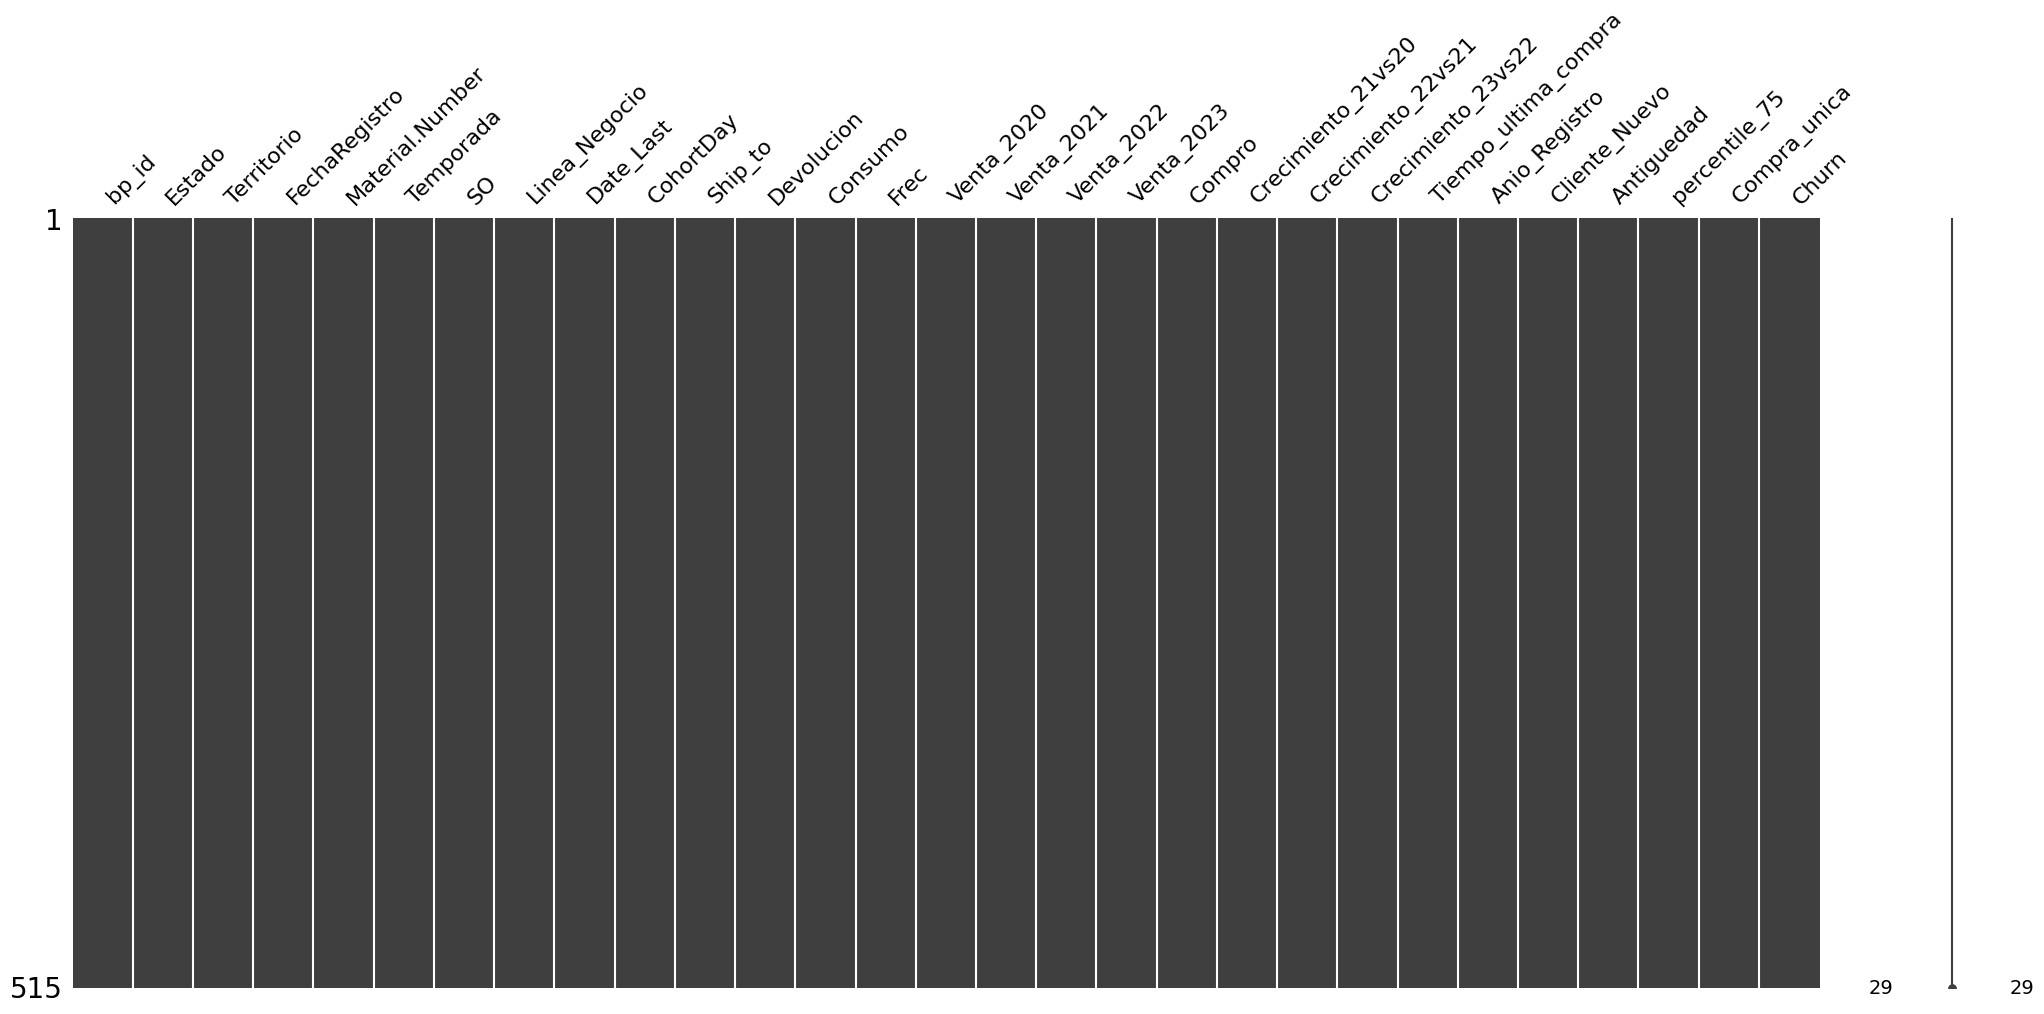

In [398]:
msno.matrix(new_df);

In [399]:
import plotly.graph_objects as go

# Crear un DataFrame con los valores y etiquetas
labels = [False, True]
value_counts = new_df['Churn'].value_counts()
total = len(new_df['Churn'])

# Calcular las proporciones y porcentajes
proportions = value_counts / total
percentages = (value_counts / total) * 100

# Crear una lista de etiquetas personalizada con conteo y porcentaje
custom_labels = [f'{label} ({count}, {percent:.2f}%)' for label, count, percent in zip(labels, value_counts, percentages)]

# Crear la figura
fig = go.Figure(data=[go.Pie(labels=custom_labels, values=proportions, hole=0.5)])

fig.update_traces(
    hoverinfo='label+percent',
    textinfo='label+percent',
    textfont_size=20,
    marker=dict(
        colors=['#ffb300', '#5f7800', '#abb400'],
        line=dict(color='#000000', width=2)
    ),
    pull=[0.1, 0.1]  # Controla la posición de las etiquetas por fuera de la gráfica
)

fig.update_layout(
    title={
        'text': "Distribución de Churn",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font=dict(
        family="Arial, monospace",
        size=20,
        color="#000000"
    )
)


fig.write_image(r'C:\Users\carlo\OneDrive\Documentos\Tesis Carlos Espadin\Gráficas e Imagenes\Distribucion_Churn.png')
# go.savefig(r'C:\Users\carlo\OneDrive\Documentos\Tesis Carlos Espadin\Gráficas e Imagenes\Distribucion_Churn.png')

fig.show()


Exportamos los archivos para usar el algoritmo de regresión logistica

In [400]:
# Escribir el DataFrame en un archivo de Excel
new_df.to_excel('./Output/Customer_Churn.xlsx', index=False)